In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

### Czarne punkty na mapie to stacje z których są pobierane informacje

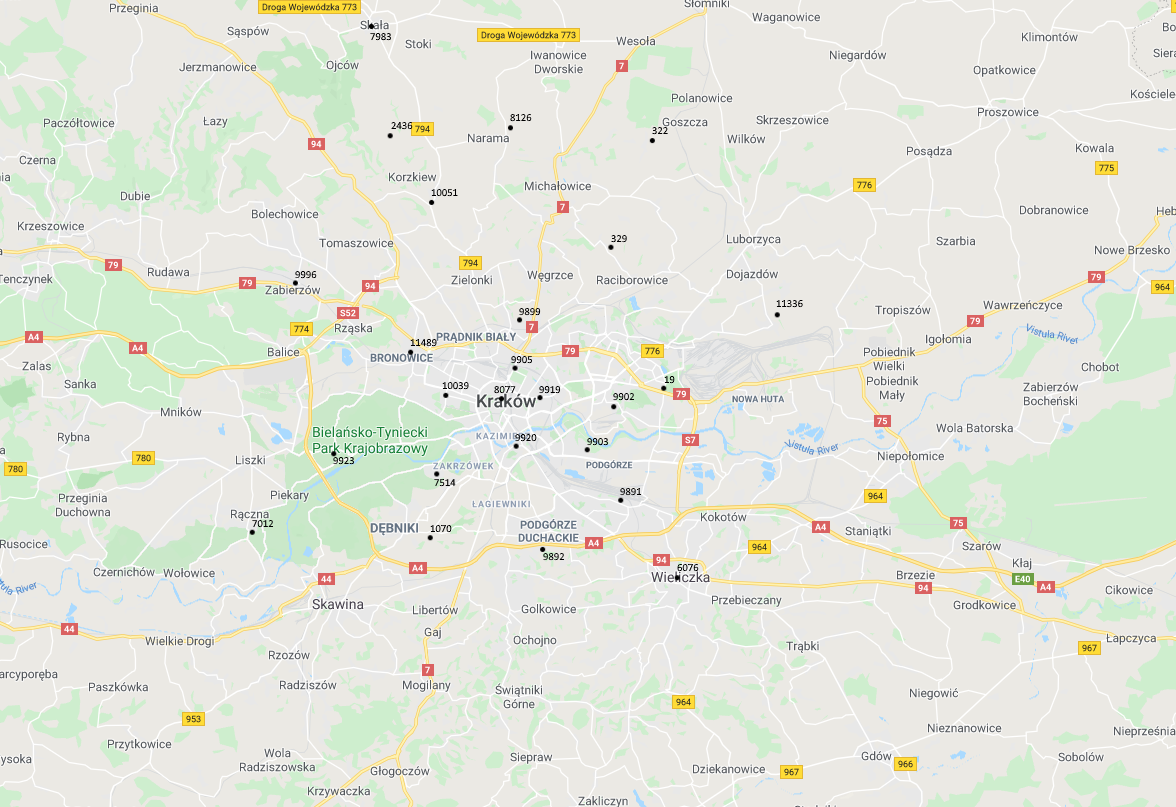

In [11]:
from IPython.display import Image
Image(filename='mapa_google.png') 
# TODO: oznaczyc kazda ze stacji jednym kolorem by byly zawsze takie same na wykresach

## Wczytanie danych z pliku csv

In [12]:
df = pd.read_csv('./measurements.csv', header = 0).iloc[:, 1:] # usuń kolumnę id
df = df.drop(columns=['indexLevel'])

## Wczytanie danych z prosto z bazy danych

In [88]:
import sqlalchemy
import pyodbc

fo = open('password.conf', 'r+')
password = fo.readline()
connection_string = 'Driver={ODBC Driver 13 for SQL Server};Server=tcp:airly-db-server.database.windows.net,1433;Database=AirlyDatabase;Uid=admin1;Pwd=%s;Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;' % (password)

cnxn = pyodbc.connect(connection_string)
df = pd.read_sql_query('select * from measurement', cnxn)

In [89]:
df['fromDataTime'] = df['fromDataTime'].apply(lambda x: pd.to_datetime(x))
df['tillDateTime'] = df['tillDateTime'].apply(lambda x: pd.to_datetime(x))

df

id  installationId        fromDataTime        tillDateTime   PM1  \
0        1              19 2020-03-06 15:00:00 2020-03-06 16:00:00   NaN   
1        2              19 2020-03-06 16:00:00 2020-03-06 17:00:00   NaN   
2        3              19 2020-03-06 17:00:00 2020-03-06 18:00:00   NaN   
3        4              19 2020-03-06 18:00:00 2020-03-06 19:00:00   NaN   
4        5              19 2020-03-06 19:00:00 2020-03-06 20:00:00   NaN   
...    ...             ...                 ...                 ...   ...   
7284  7285           11489 2020-03-22 15:00:00 2020-03-22 16:00:00  3.85   
7285  7286           11489 2020-03-22 16:00:00 2020-03-22 17:00:00  5.35   
7286  7287           11489 2020-03-22 17:00:00 2020-03-22 18:00:00  5.96   
7287  7288           11489 2020-03-22 18:00:00 2020-03-22 19:00:00  6.57   
7288  7289           11489 2020-03-22 19:00:00 2020-03-22 20:00:00  5.95   

       PM25   PM10  PRESSURE  HUMIDITY  TEMPERATURE  indexValue indexLevel  \
0      9.18  31.15       NaN       NaN          NaN       31.15        LOW   
1     11.90  35.42       NaN       NaN          NaN       35.42        LOW   
2     14.68  38.20       NaN       NaN          NaN       38.20        LOW   
3     13.06  32.74       NaN       NaN          NaN       32.74        LOW   
4     11.14  24.30       NaN       NaN          NaN       24.30   VERY_LOW   
...     ...    ...       ...       ...          ...         ...        ...   
7284   5.33   9.83   1031.25     53.79         0.27        9.83   VERY_LOW   
7285   7.39  13.78   1031.85     62.92        -0.07       13.78   VERY_LOW   
7286   8.60  16.61   1032.56     68.68        -0.79       16.61   VERY_LOW   
7287   9.34  17.42   1033.27     69.55        -1.22       17.42   VERY_LOW   
7288   8.42  16.04   1033.38     72.48        -1.42       16.04   VERY_LOW   

        NO2      CO CLOUDCOVER WINDDIRECTION WINDSPEED  
0     65.31  440.75       None          None      None  
1     68.93  464.01       None          None      None  
2     70.74  528.15       None          None      None  
3     61.21  478.53       None          None      None  
4     34.67  392.50       None          None      None  
...     ...     ...        ...           ...       ...  
7284    NaN     NaN       None          None      None  
7285    NaN     NaN       None          None      None  
7286    NaN     NaN       None          None      None  
7287    NaN     NaN       None          None      None  
7288    NaN     NaN       None          None      None  

[7289 rows x 17 columns]

In [14]:
installationd_id = df['installationId'].unique()
measurements_by_installation_id = dict()
for id in installationd_id:
    measurements_by_installation_id[id] = df.loc[df['installationId'] == id]

In [15]:
import matplotlib.dates as mdates

def plotAllData(column: str):
    days = mdates.DayLocator()
    days_fmt = mdates.DateFormatter('%d')

    fig, ax = plt.subplots()

    fig.set_figheight(15)
    fig.set_figwidth(15)
    for id, measurements in measurements_by_installation_id.items():
        ax.plot(measurements.fromDataTime, measurements[column], label=id)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.grid(True)

    plt.xlabel('Dzień')
    plt.ylabel(column)
    plt.title(column)
    plt.legend()

    plt.show()

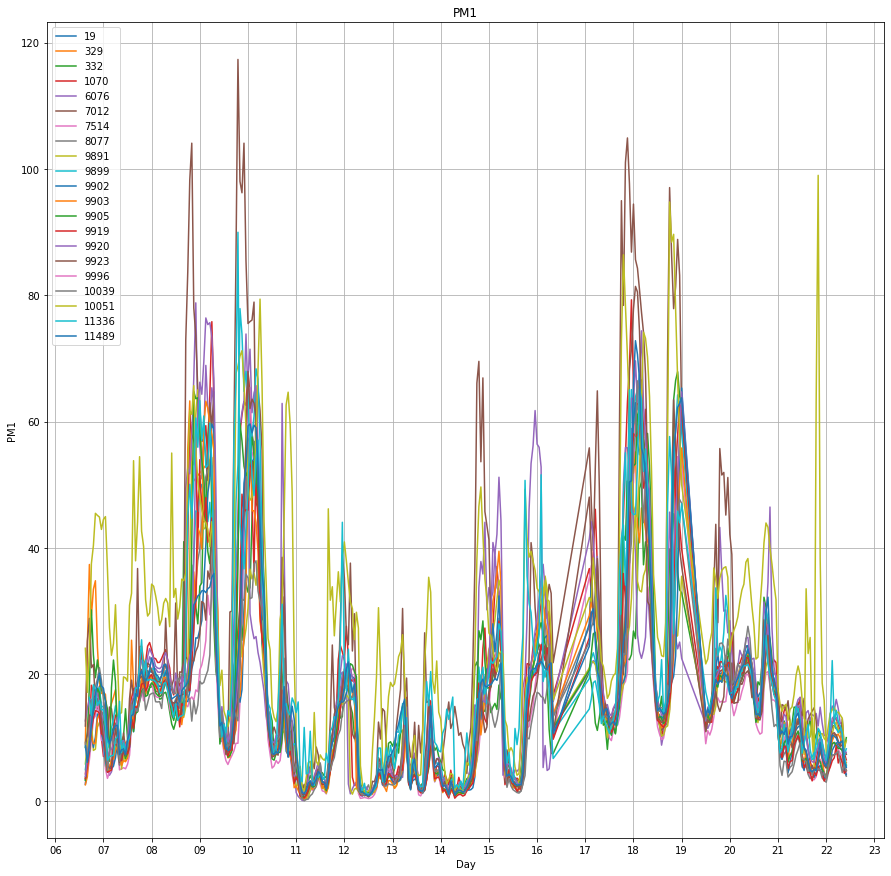

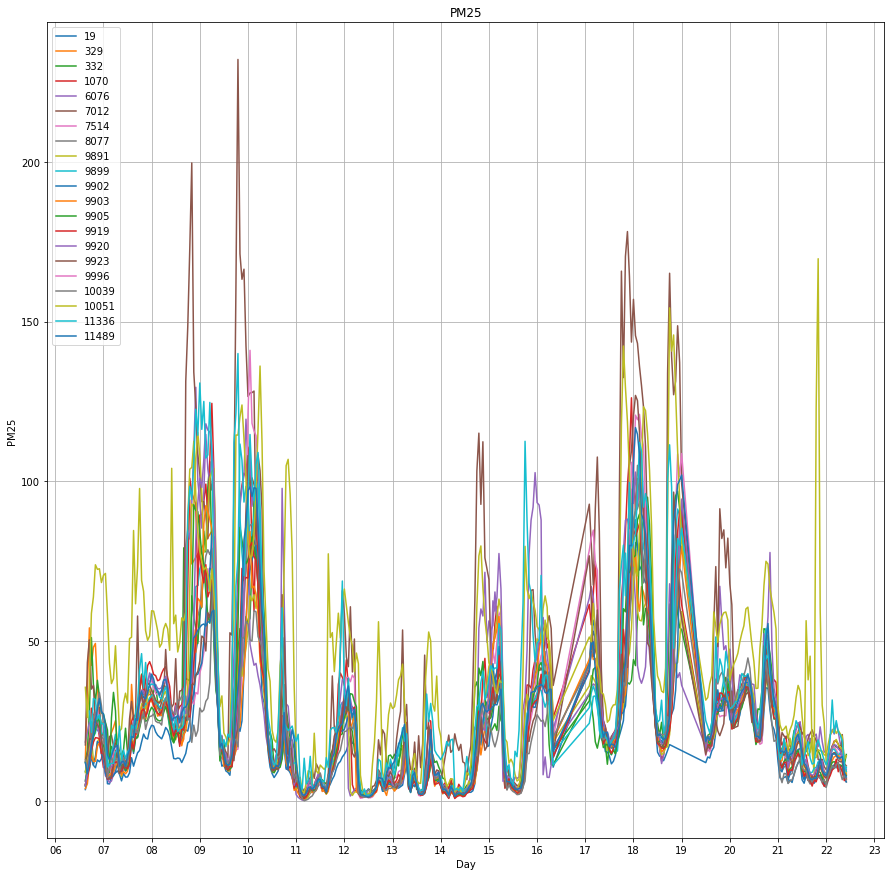

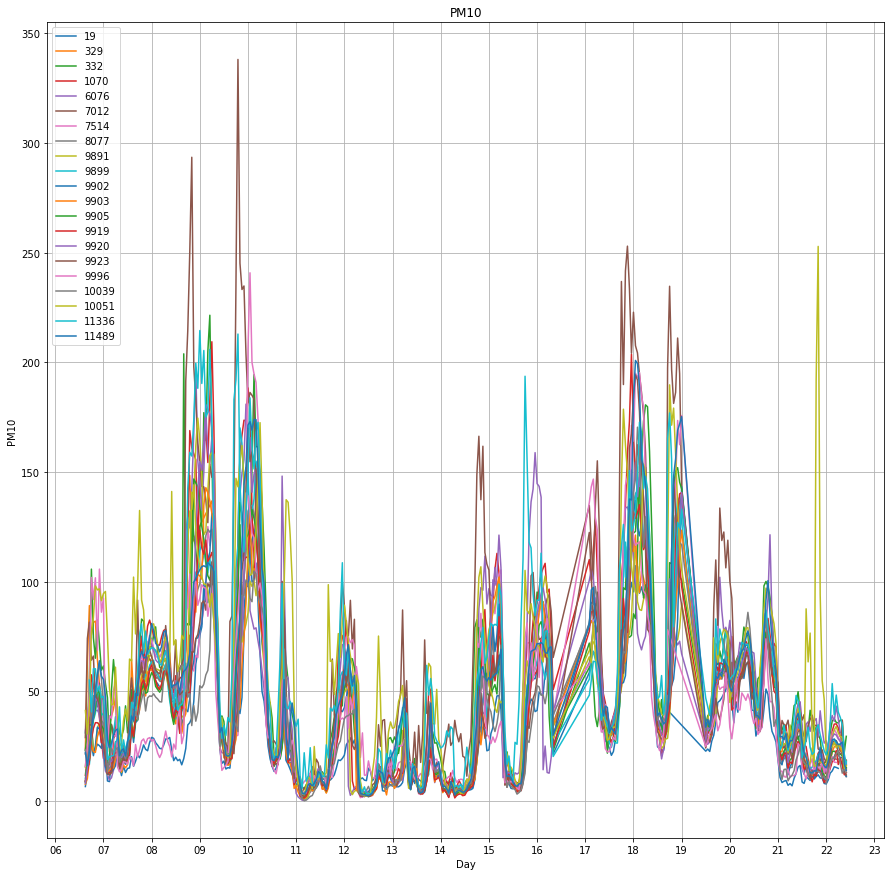

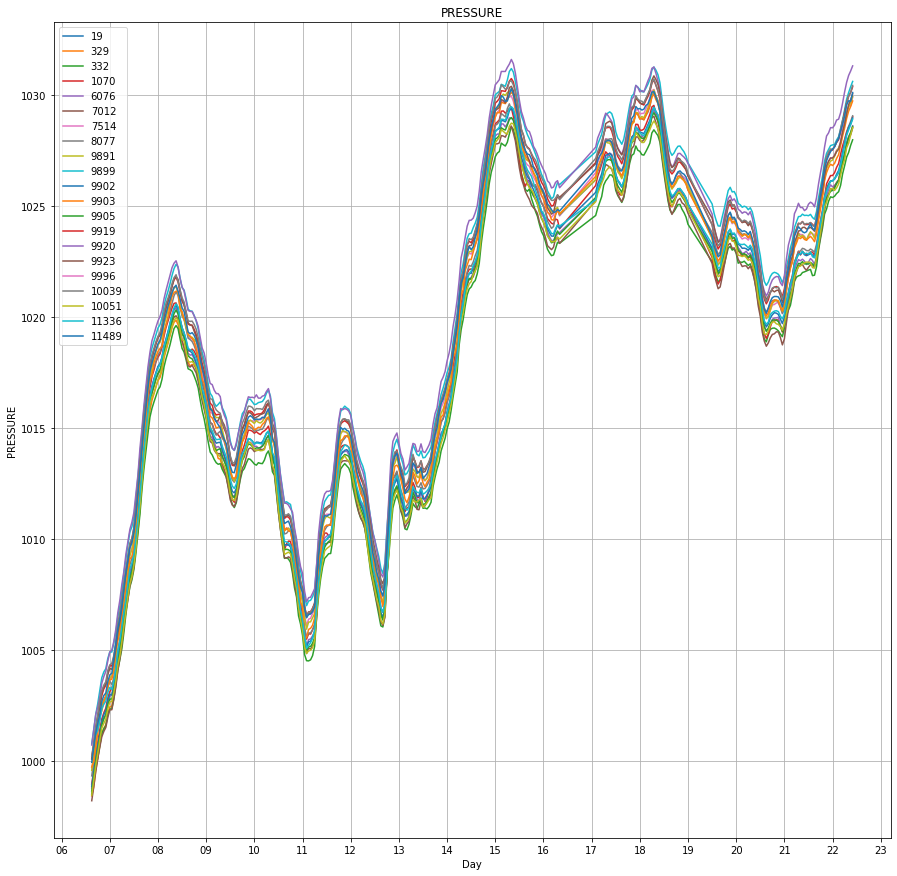

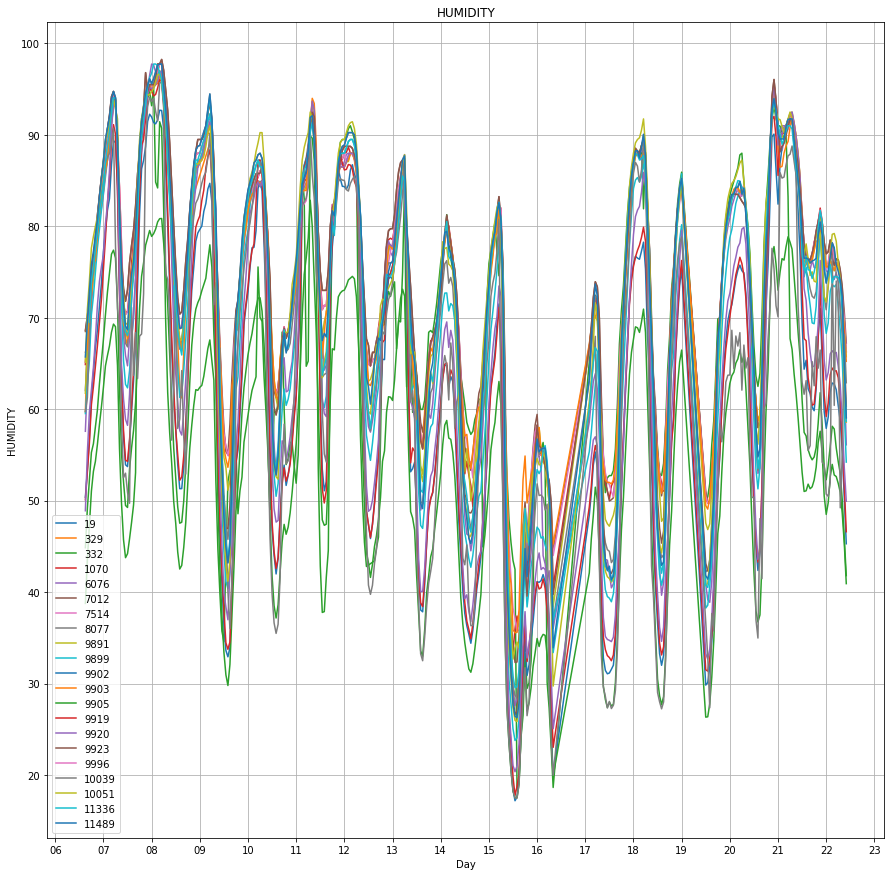

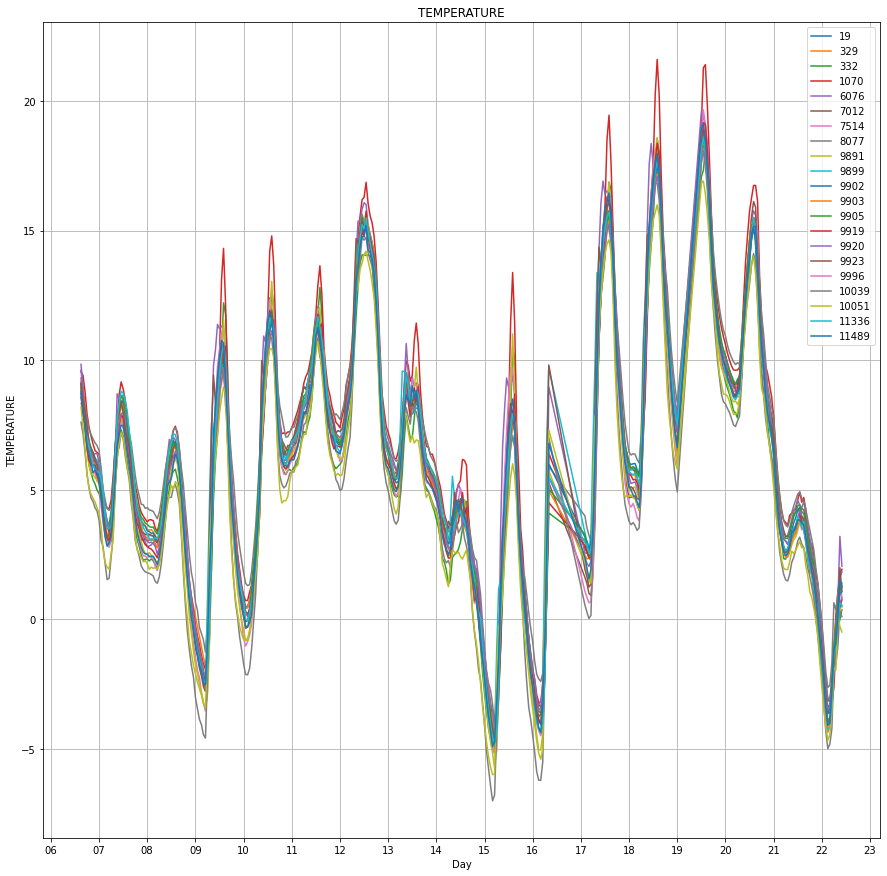

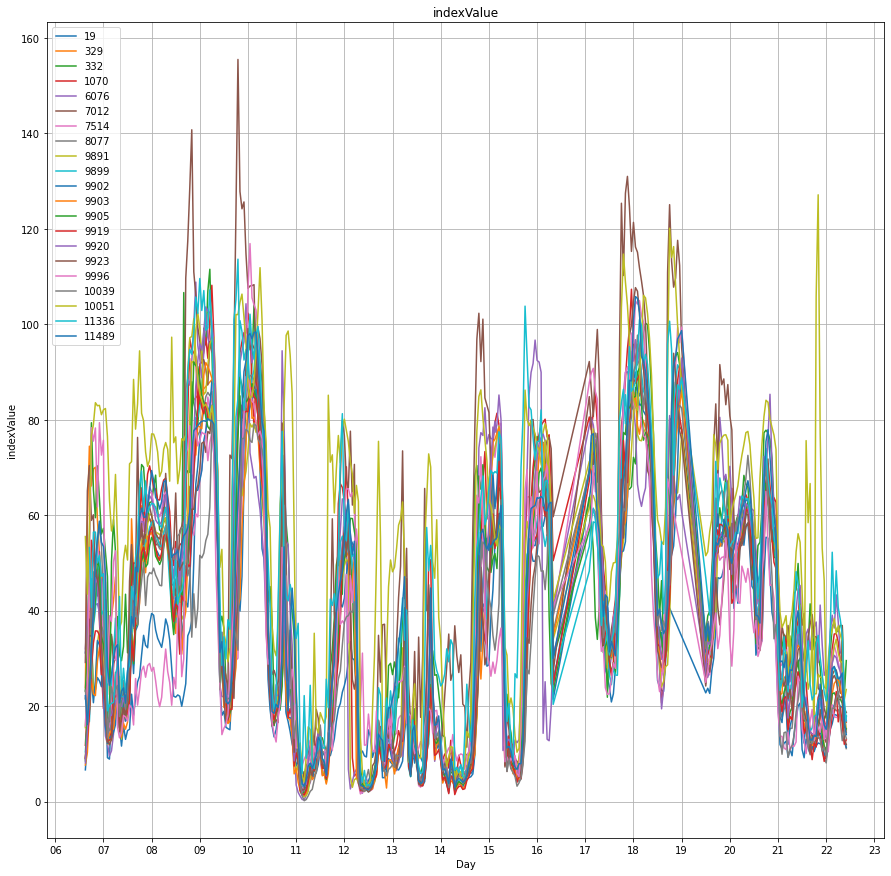

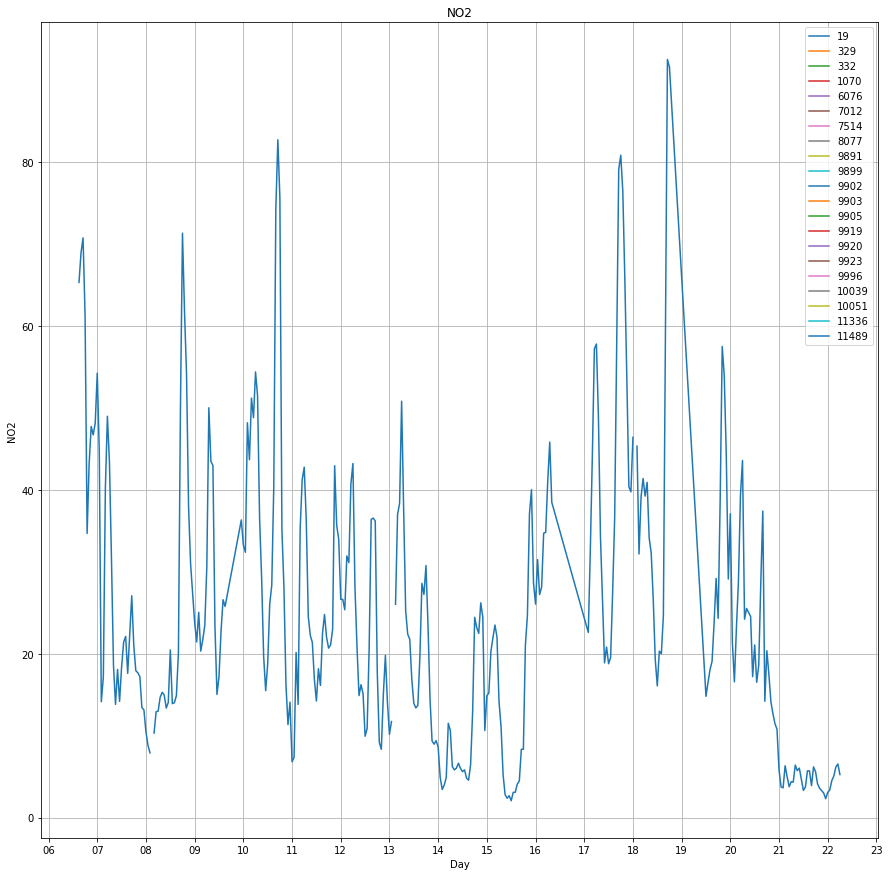

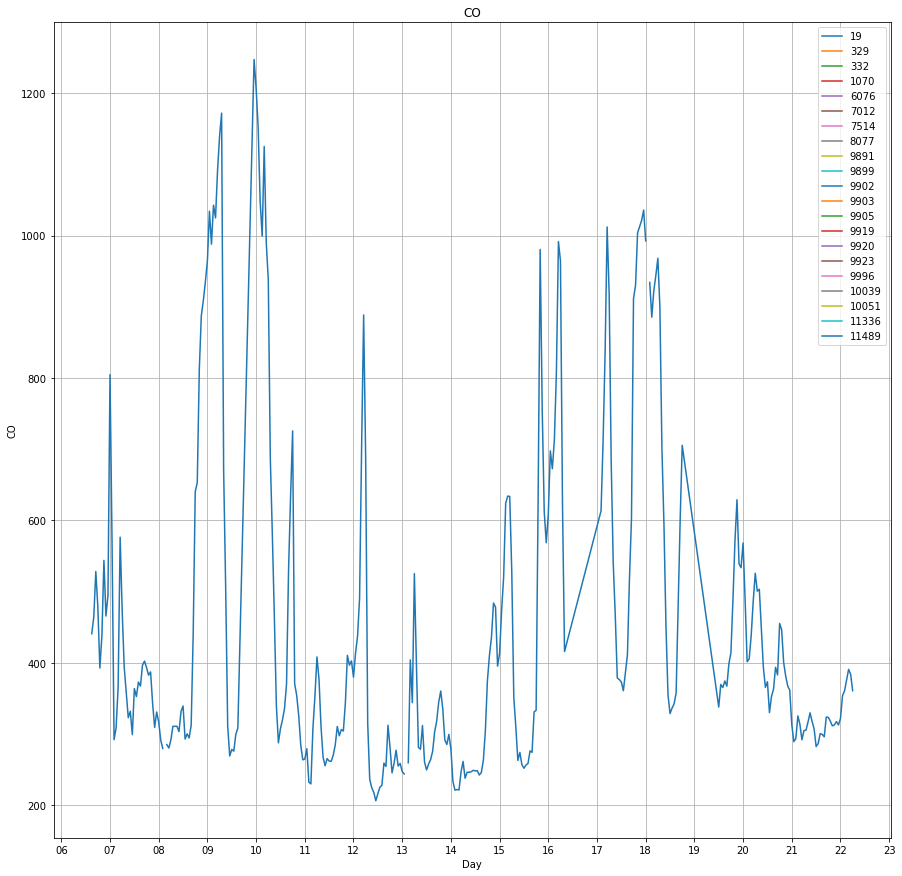

In [16]:
columns_to_plot = np.delete(df.columns.values, (0, 1, 2))
for col in columns_to_plot:
    plotAllData(col)

In [18]:
ins = pd.read_csv('./installation.csv', header = 0)
ins

id   latitude  longitude country                city  \
0      19  50.069308  20.053492  Poland              Kraków   
1     329  50.131500  20.014326  Poland         Ksiazniczki   
2     332  50.175018  20.039064  Poland  Zagórzyce Dworskie   
3    1070  50.002872  19.891985  Poland              Kraków   
4    6076  49.985546  20.059961  Poland           Wieliczka   
5    7012  50.006187  19.769005  Poland              Raczna   
6    7514  50.033099  19.895774  Poland              Kraków   
7    7983  50.230379  19.853520  Poland               Skala   
8    8077  50.062006  19.940984  Poland              Kraków   
9    8126  50.185143  19.947767  Poland            Kozierów   
10   9891  50.020586  20.022960  Poland              Kraków   
11   9892  49.999615  19.966073  Poland              Kraków   
12   9899  50.099239  19.953954  Poland              Kraków   
13   9902  50.062677  20.018922  Poland              Kraków   
14   9903  50.044067  19.998804  Poland              Kraków   
15   9905  50.079672  19.949190  Poland              Kraków   
16   9919  50.066747  19.962083  Poland              Kraków   
17   9920  50.044424  19.952205  Poland              Kraków   
18   9923  50.042476  19.826993  Poland              Kraków   
19   9996  50.116028  19.800639  Poland           Zabierzów   
20  10039  50.067312  19.903360  Poland              Kraków   
21  10051  50.150282  19.893212  Poland         Januszowice   
22  11336  50.114638  20.131619  Poland     Krzysztoforzyce   
23  11489  50.084966  19.877998  Poland              Kraków   

                          street buildingNumber  elevation  airly  
0                      Bulwarowa             30     203.87      0  
1                            NaN            NaN     227.36      1  
2                            NaN            NaN     315.70      1  
3              Profesora Geremka             26     245.78      1  
4           Stanislawa Moniuszki              1     240.53      1  
5                            NaN            NaN     223.38      1  
6                        Skalica            21B     212.05      1  
7                          Rynek          20-21     416.64      0  
8                     Mikolajska              4     220.38      1  
9                            NaN            NaN     359.71      1  
10  Komandora Bohdana Wronskiego              9     199.94      1  
11                       Wyzynna             30     235.34      1  
12        Macieja Slomczynskiego             18     240.98      1  
13                   Soltysowska            12G     198.28      1  
14                     Mysliwska             59     197.37      1  
15                       Rogatka              3     215.60      1  
16                      Kielecka     6/6 31-526     208.91      1  
17                       Krakusa             11     205.57      1  
18                        Dworna             46     228.21      1  
19                      Kolejowa             26     235.00      0  
20                      Reymonta             37     203.88      1  
21                           NaN            NaN     261.88      1  
22                           NaN            NaN     236.89      1  
23         osiedle Zlota Podkowa             36     230.22      1

In [73]:
def plot_humidity(installation_id):
    measurements = measurements_by_installation_id[installation_id]
    if(measurements['HUMIDITY'].isnull().all()):
        return
    
    days = mdates.DayLocator()
    days_fmt = mdates.DateFormatter('%d')

    fig, ax = plt.subplots()

    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    ax.plot(measurements.fromDataTime, measurements['HUMIDITY'], label=installation_id)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.grid(True)

    plt.xlabel('Dzień')
    plt.ylabel('Wilgotność [%]')
    plt.title('Wilgotność dla instalacji %d' % (installation_id))

    plot_name = 'HUMIDITY_' + str(installation_id)
    plt.savefig('./plots/%s.png' % (plot_name))
    plt.show()

In [71]:
def plot_temperature(installation_id):
    measurements = measurements_by_installation_id[installation_id]
    if(measurements['TEMPERATURE'].isnull().all()):
        return
    
    days = mdates.DayLocator()
    days_fmt = mdates.DateFormatter('%d')

    fig, ax = plt.subplots()

    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    ax.plot(measurements.fromDataTime, measurements['TEMPERATURE'], label=installation_id)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.grid(True)

    plt.xlabel('Dzień')
    plt.ylabel('Temperatura [C]')
    plt.title('Temperatura dla instalacji %d' % (installation_id))

    plot_name = 'TEMPERATURE_' + str(installation_id)
    plt.savefig('./plots/%s.png' % (plot_name))
    plt.show()

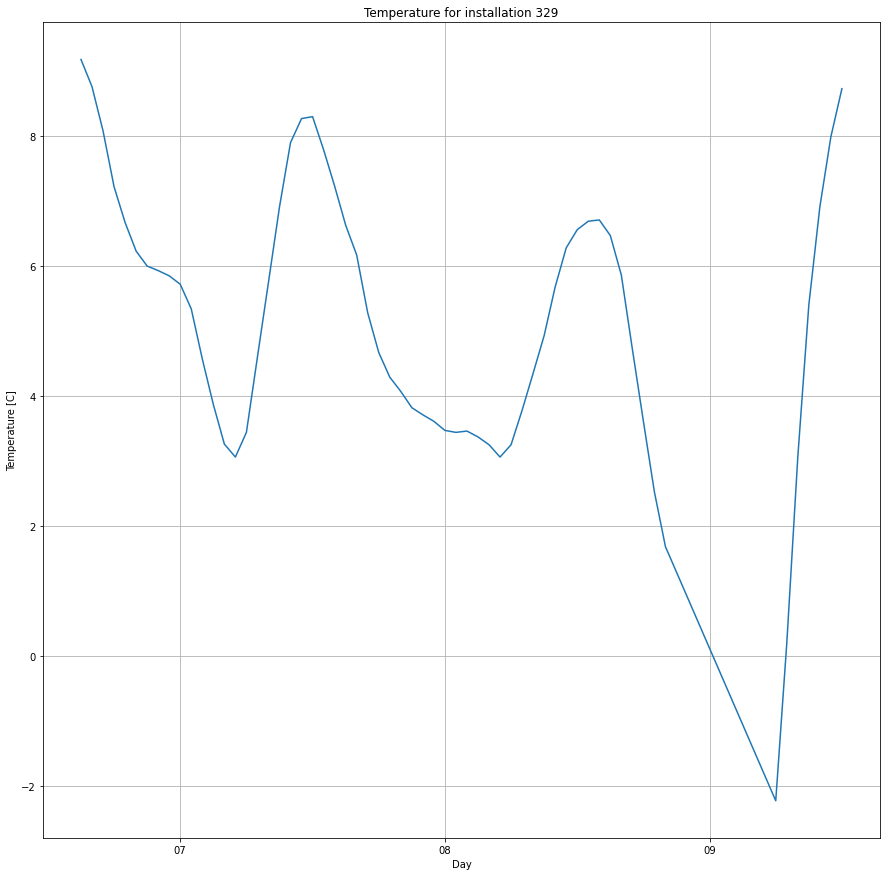

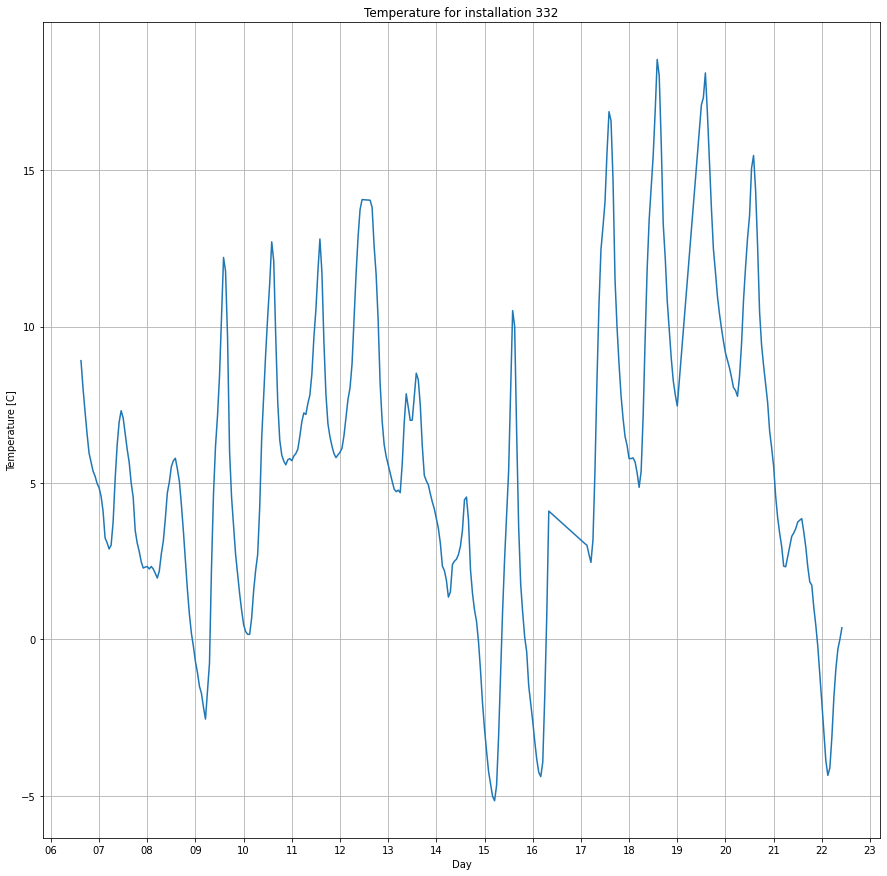

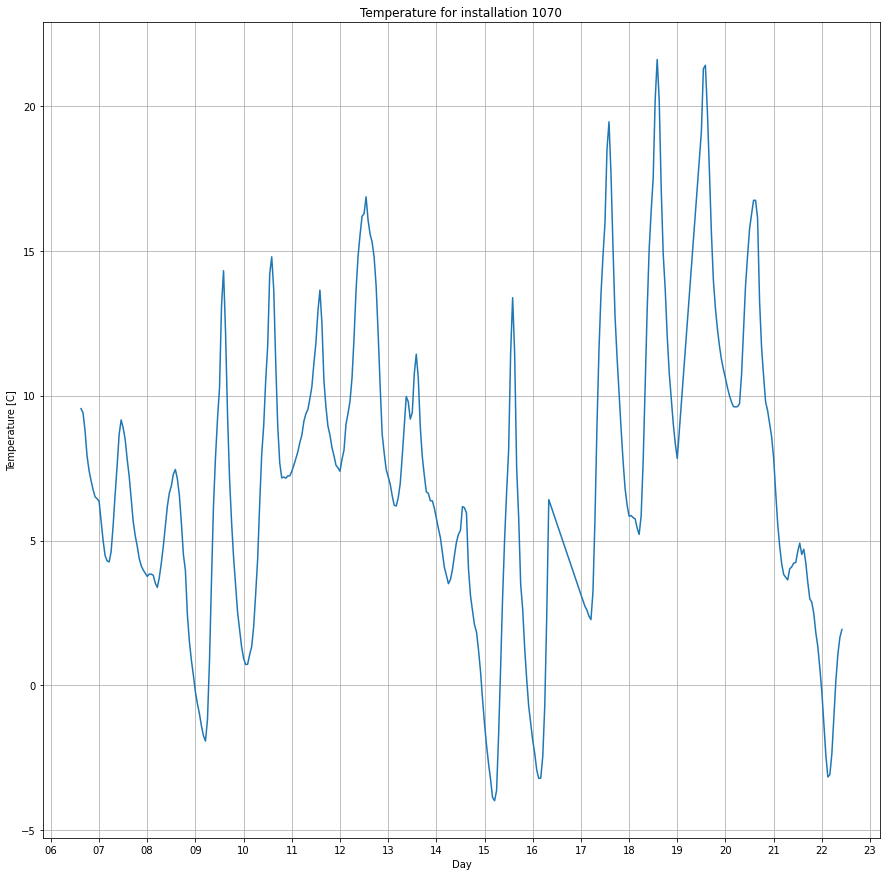

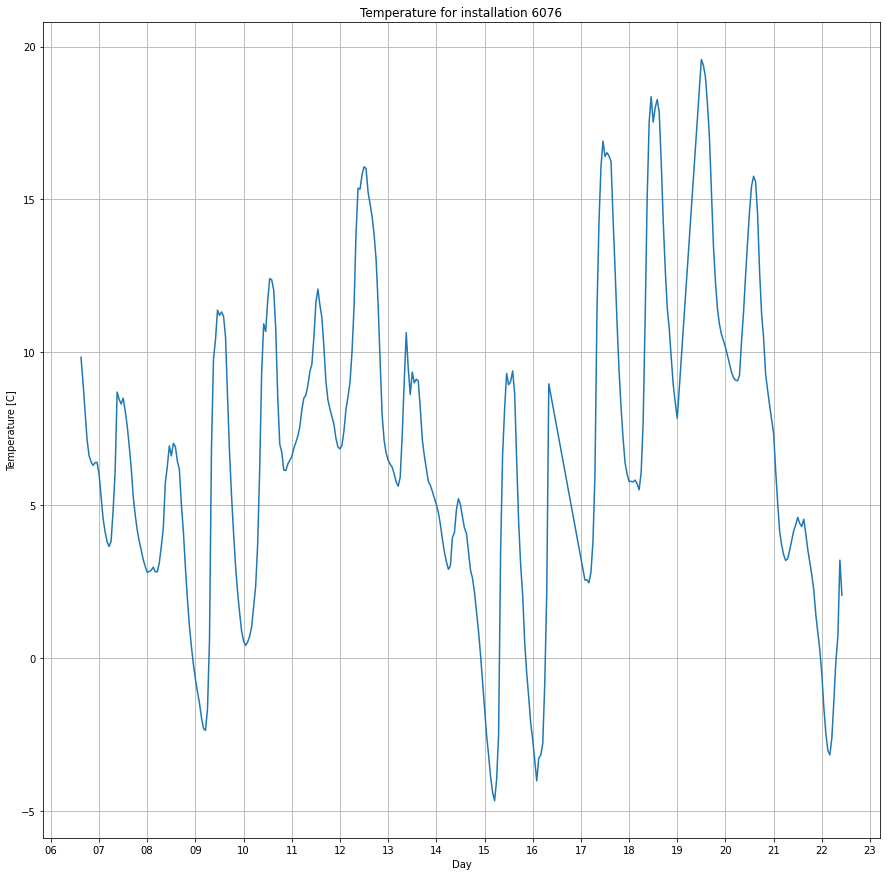

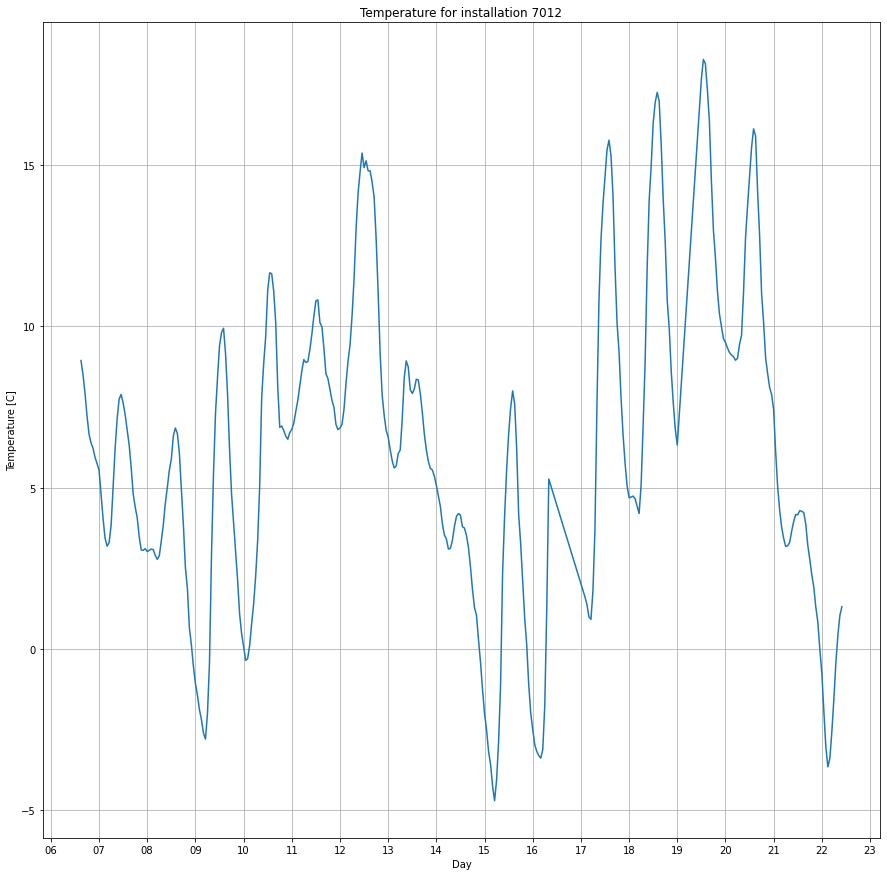

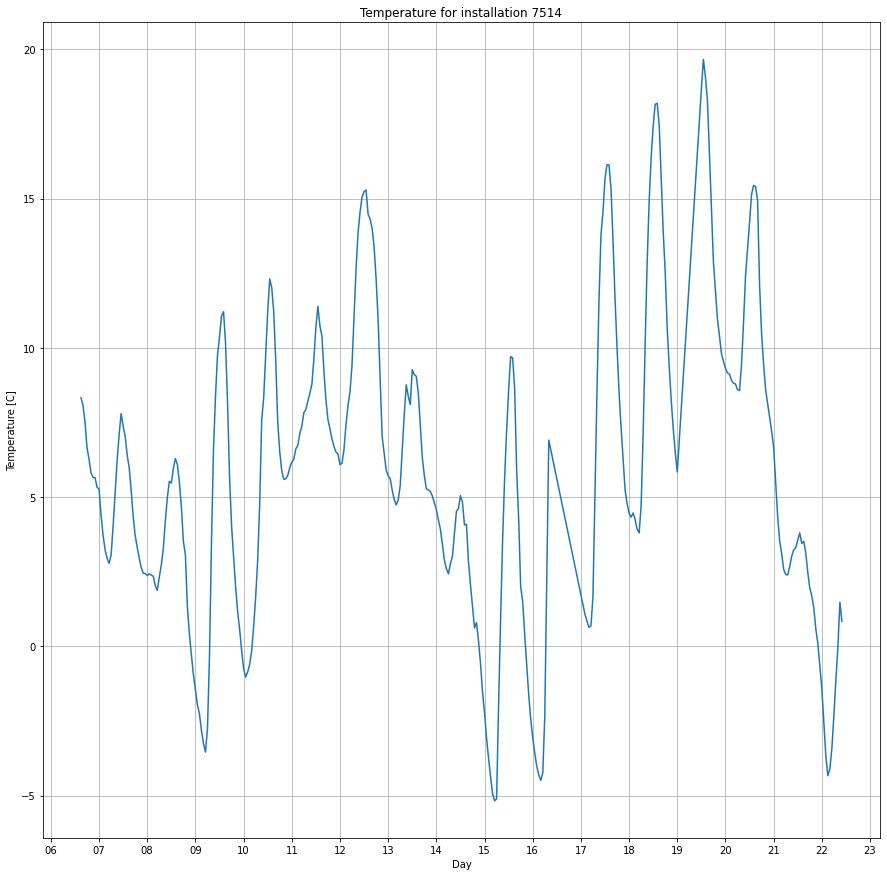

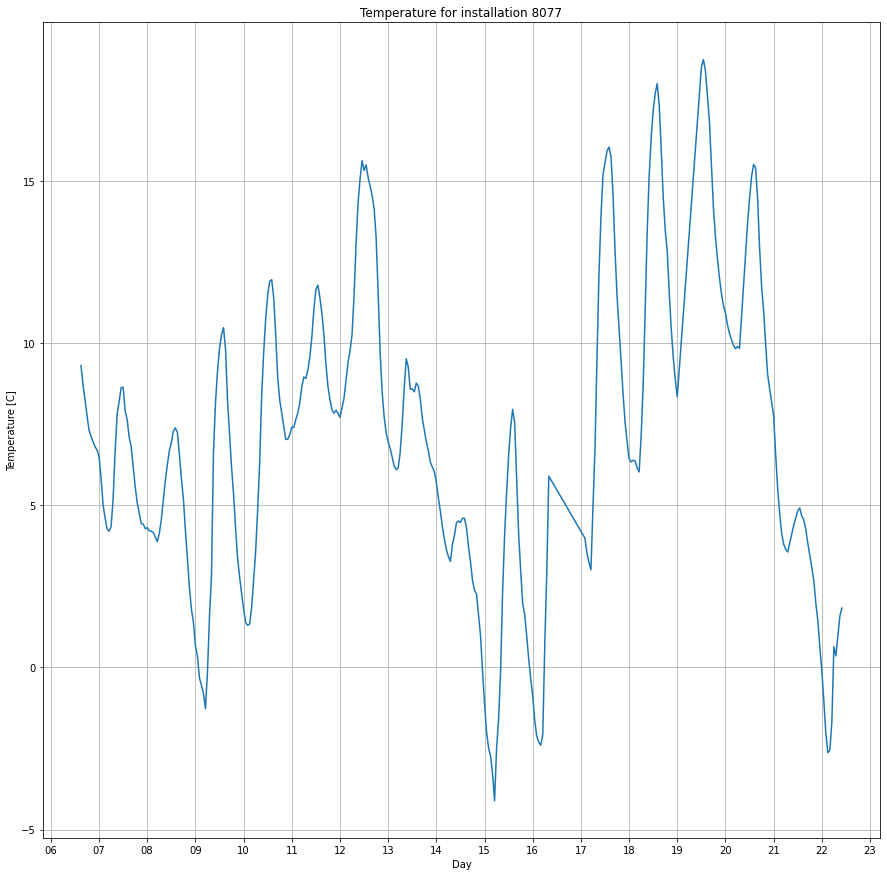

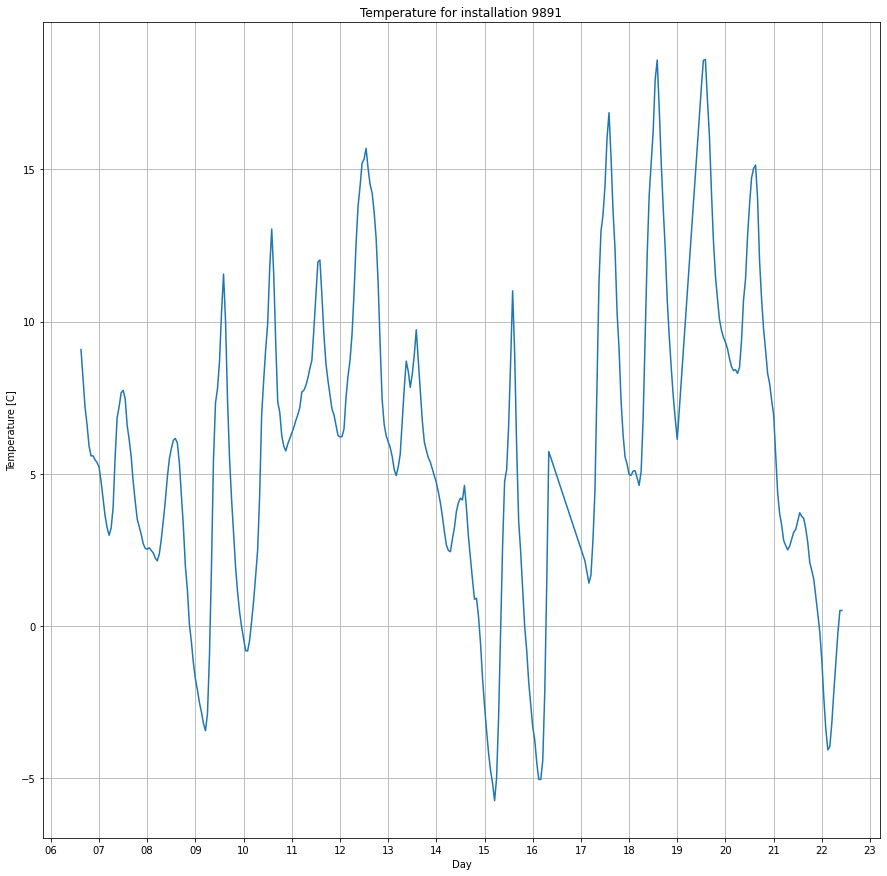

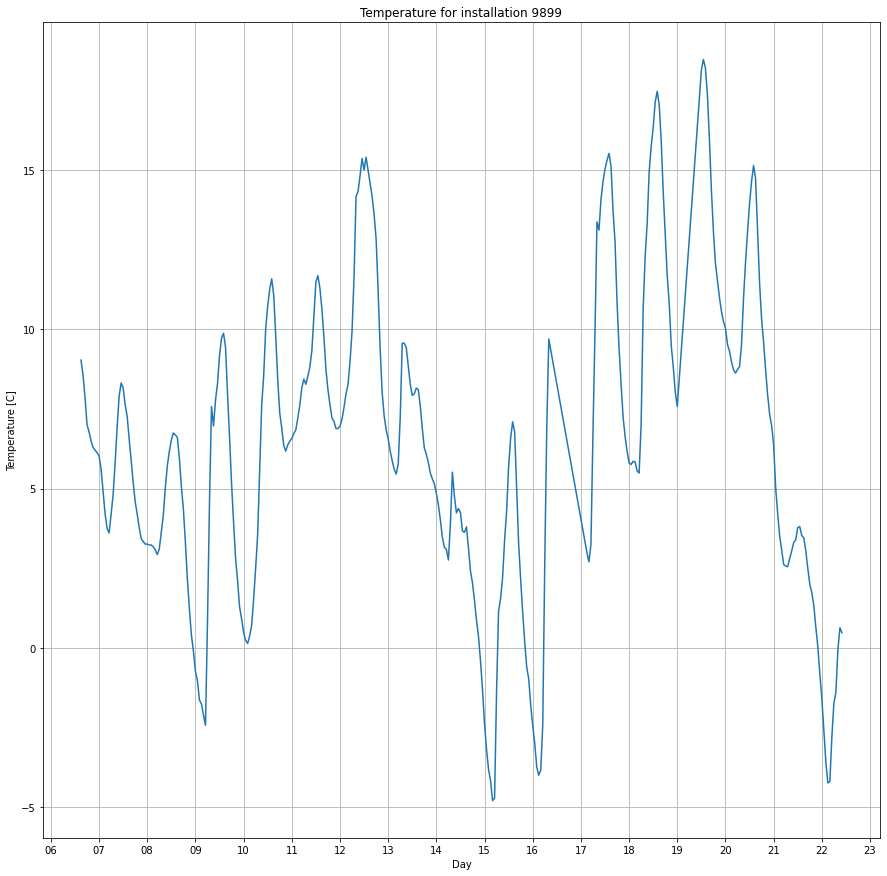

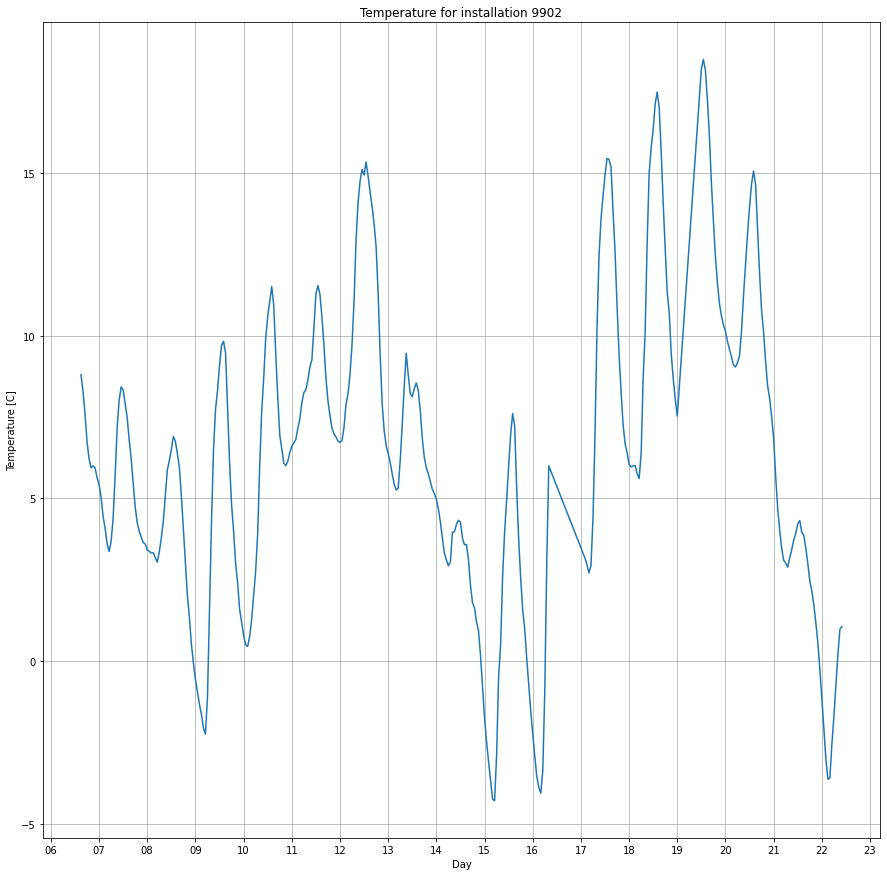

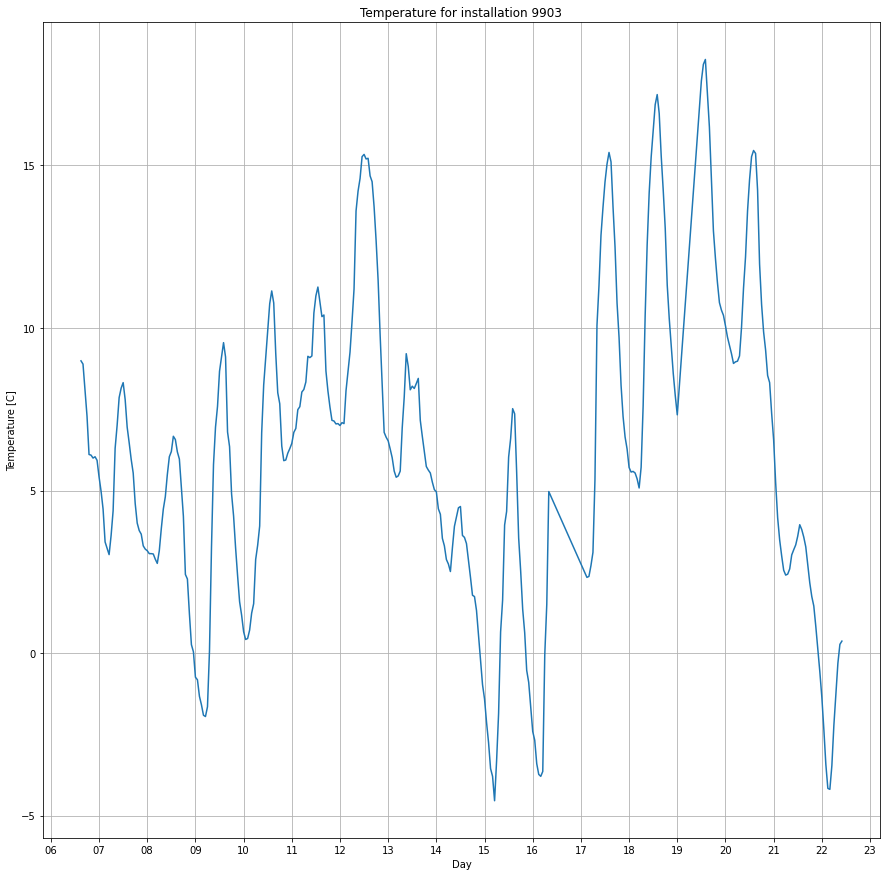

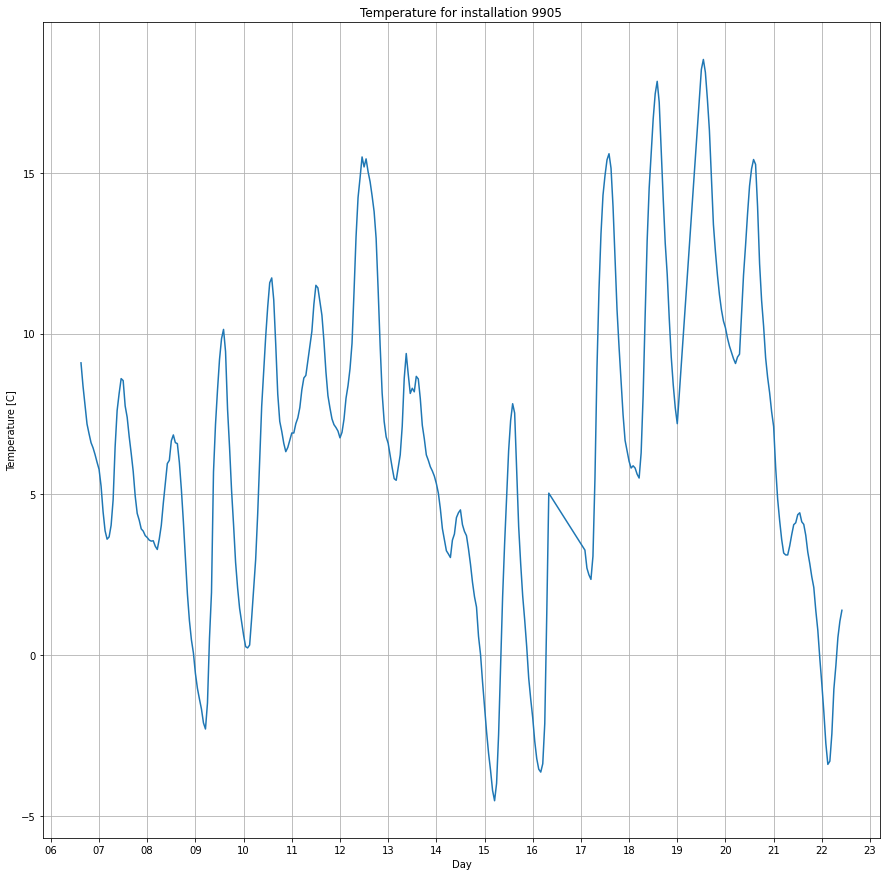

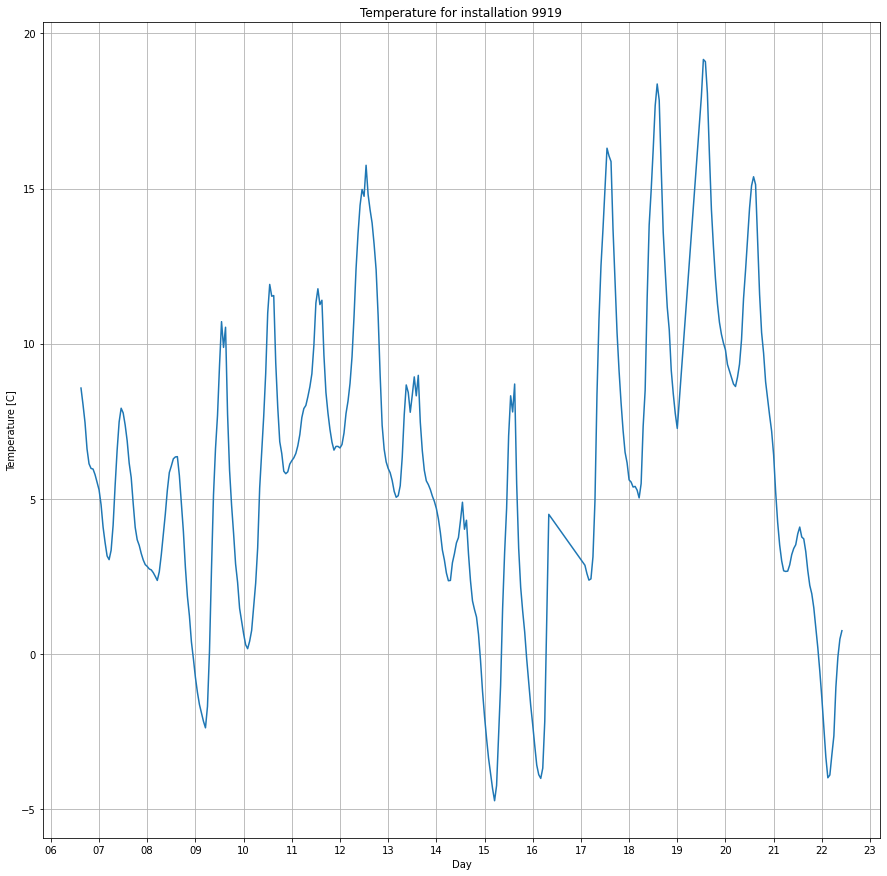

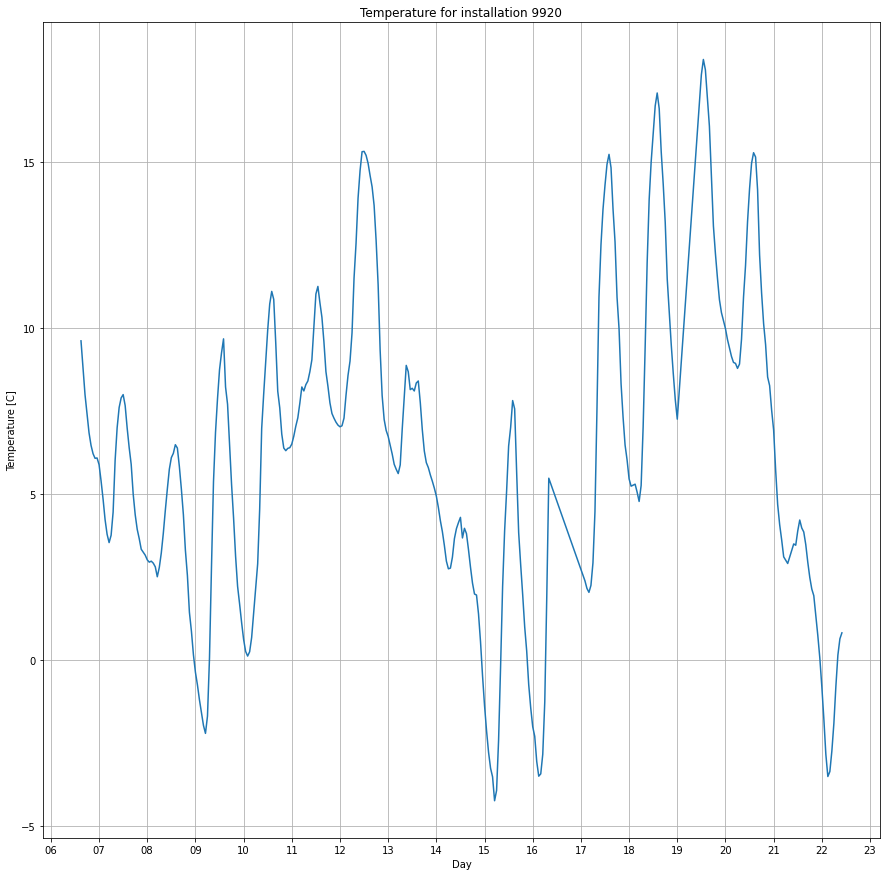

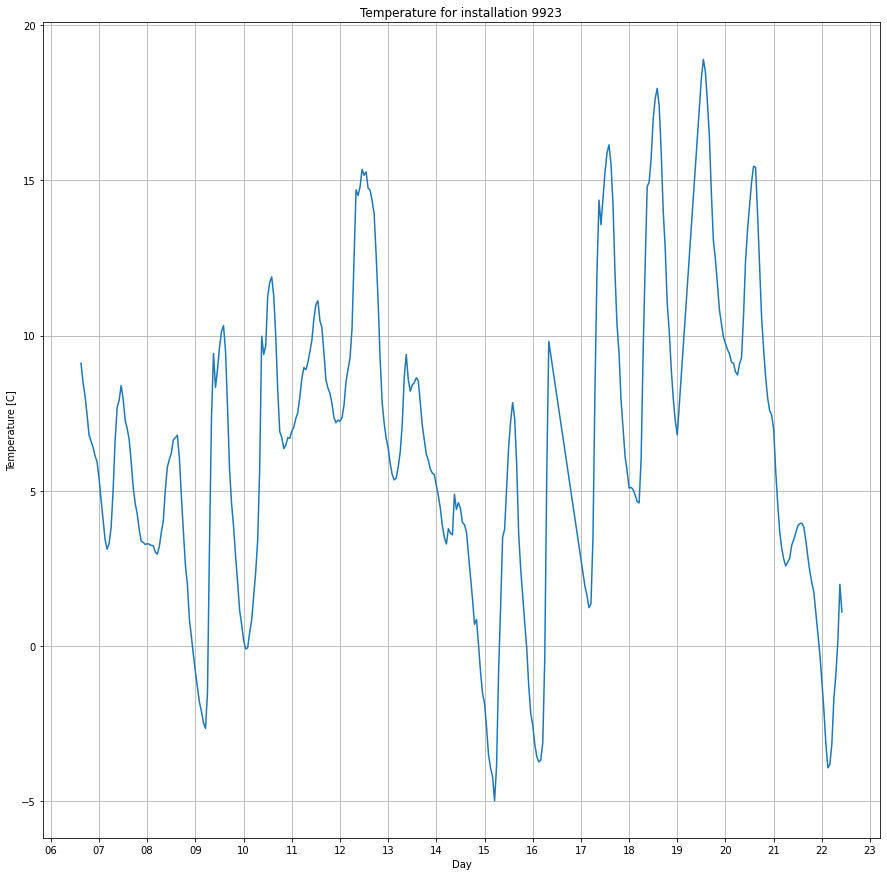

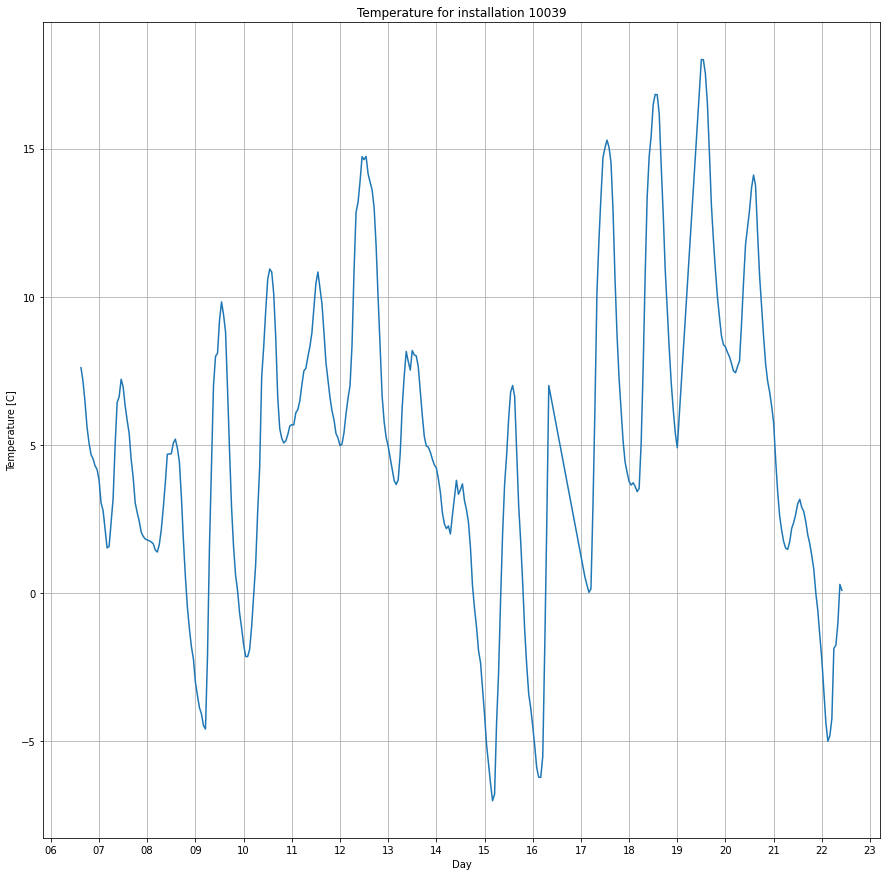

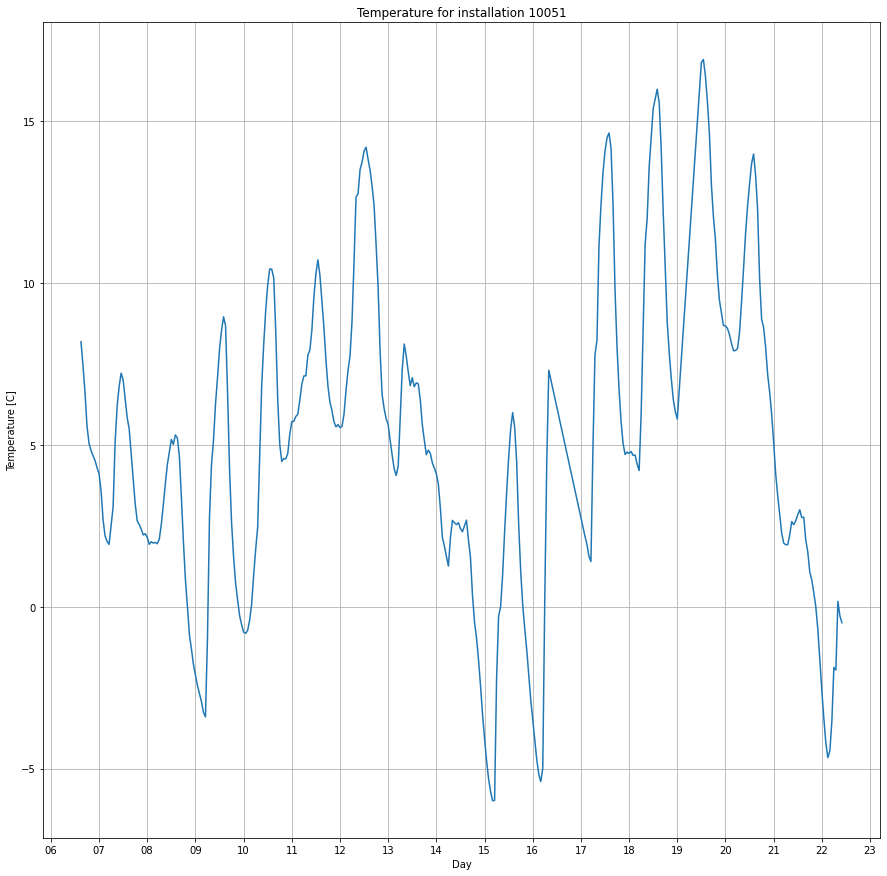

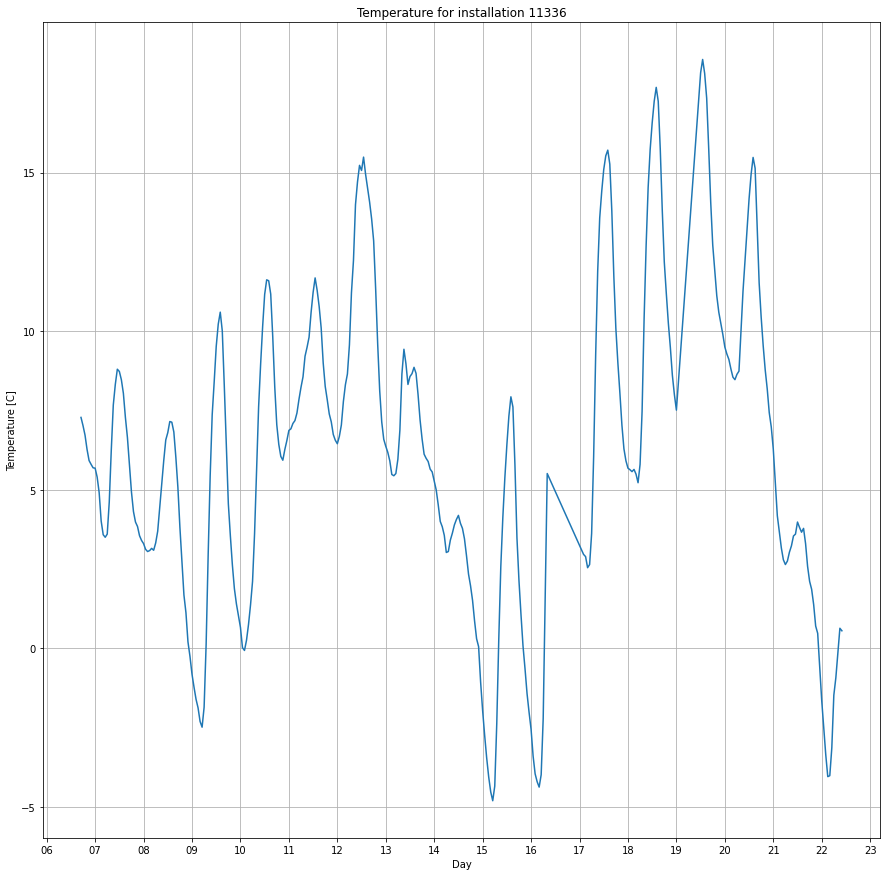

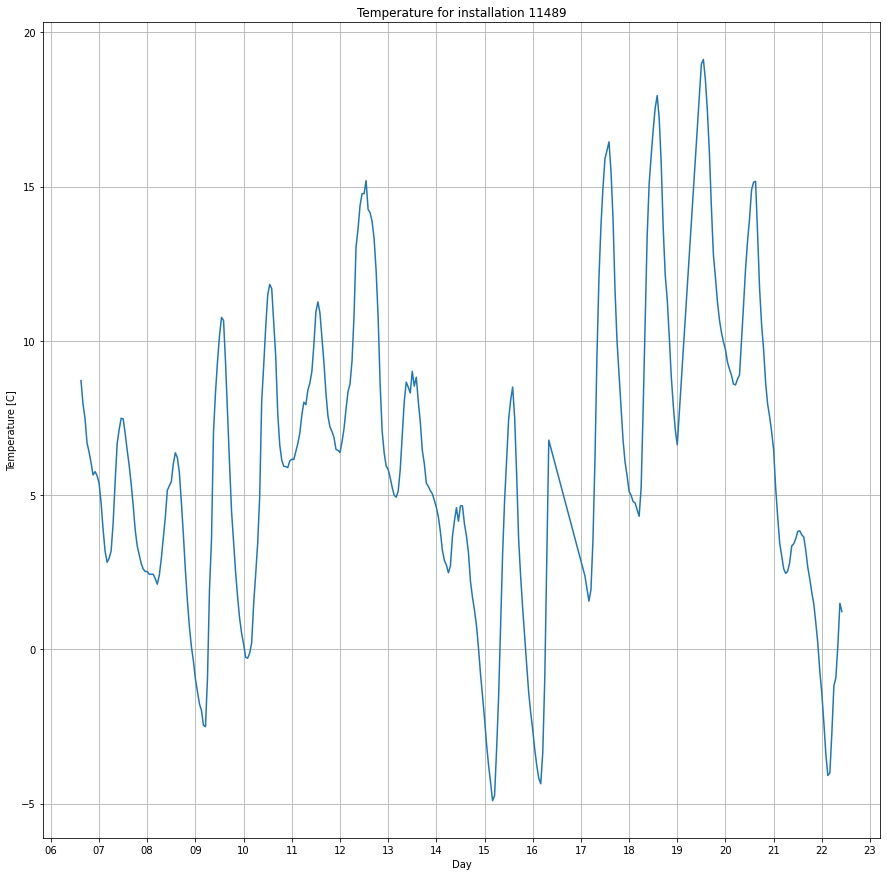

In [74]:
for id in installationd_id:
    plot_temperature(id)

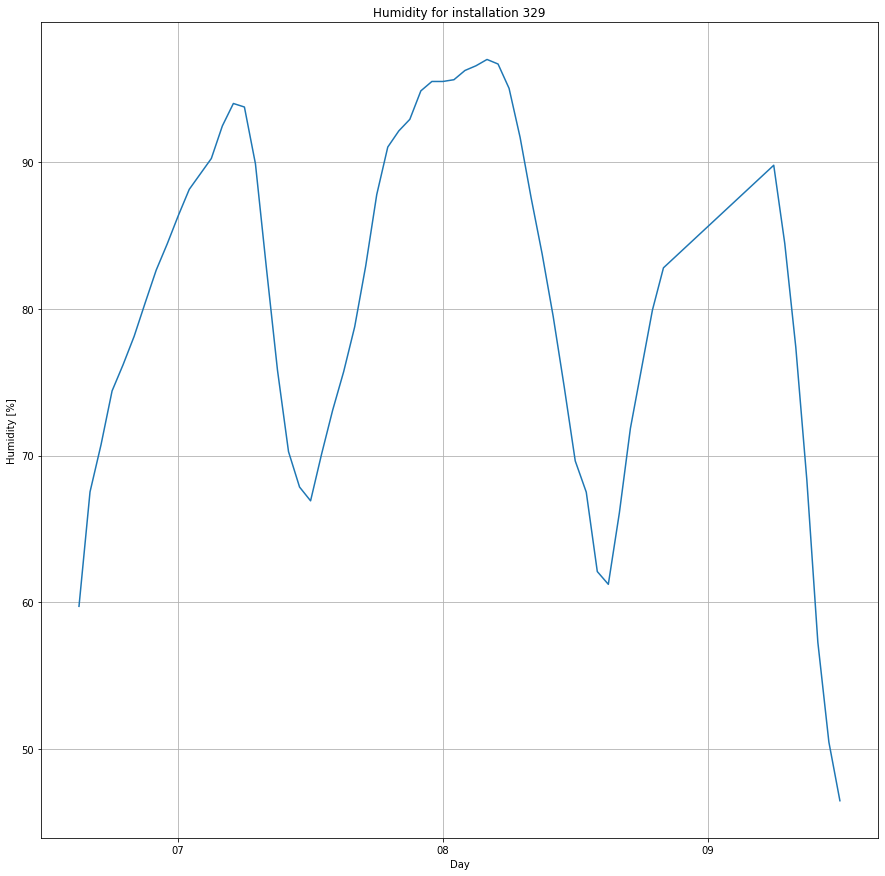

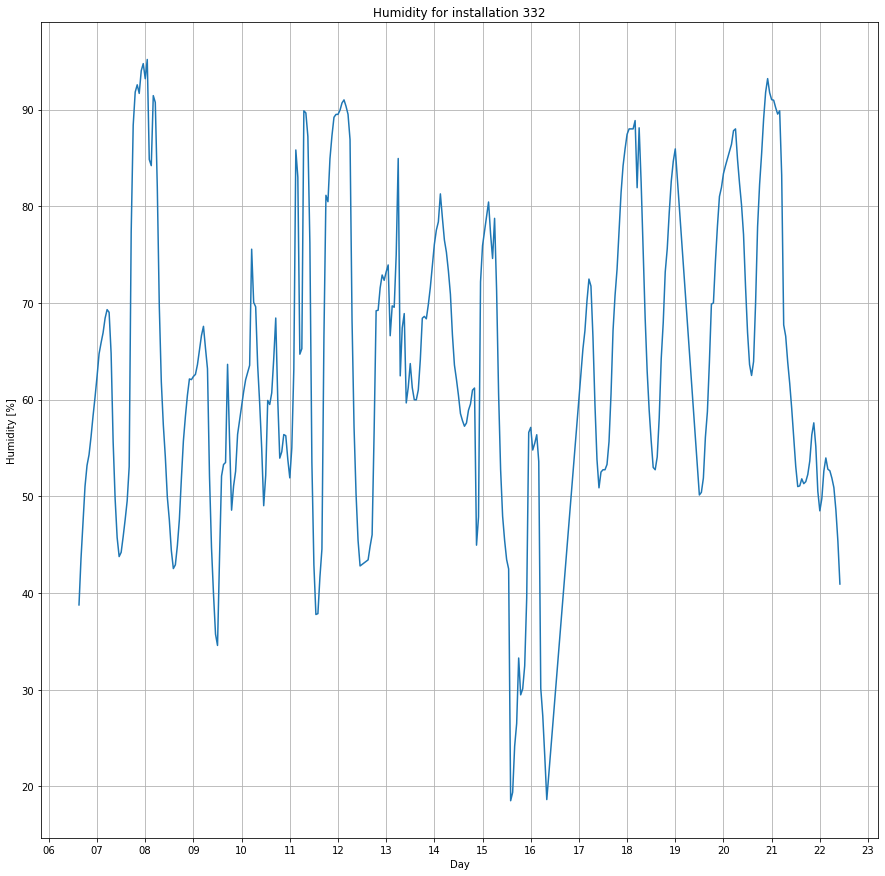

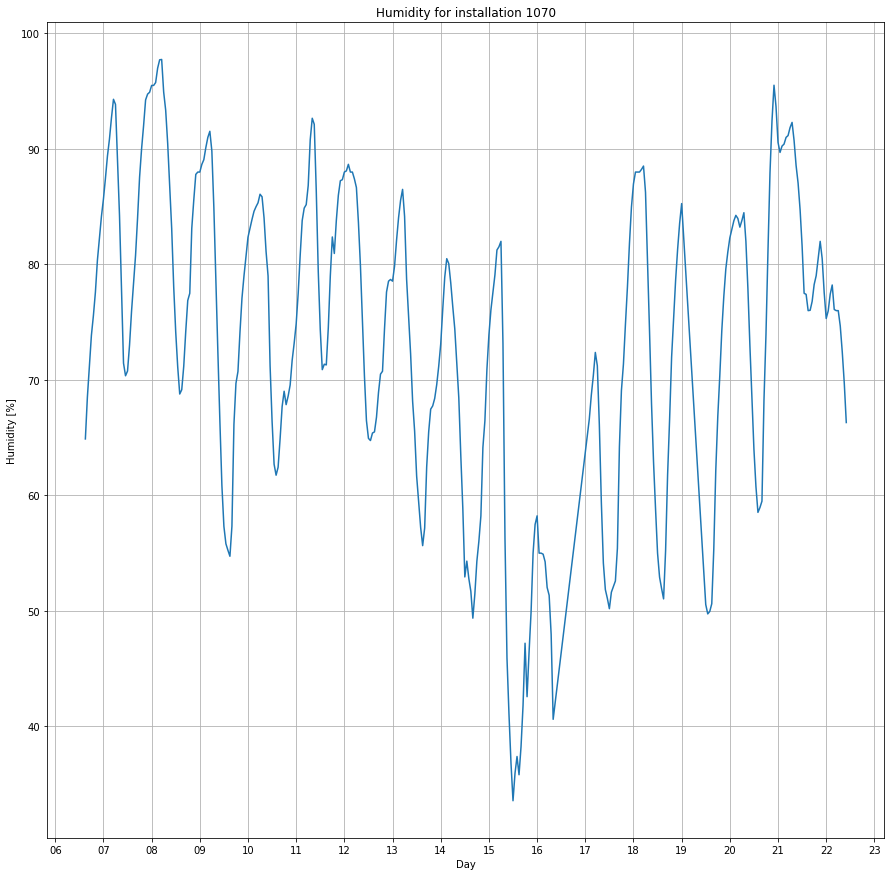

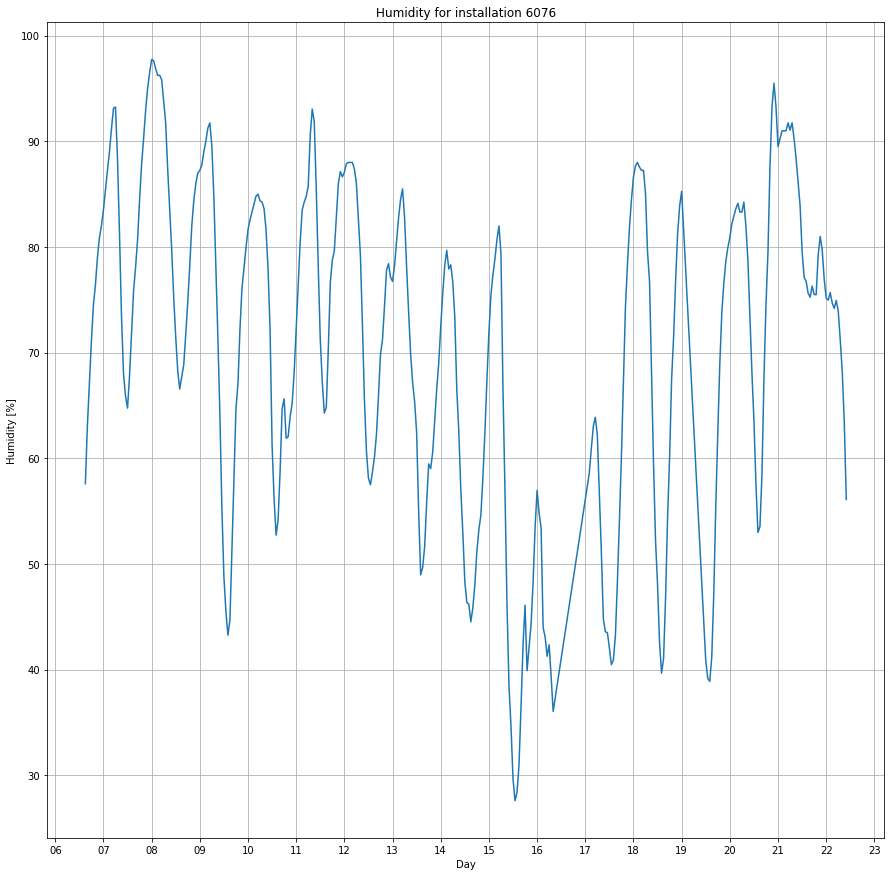

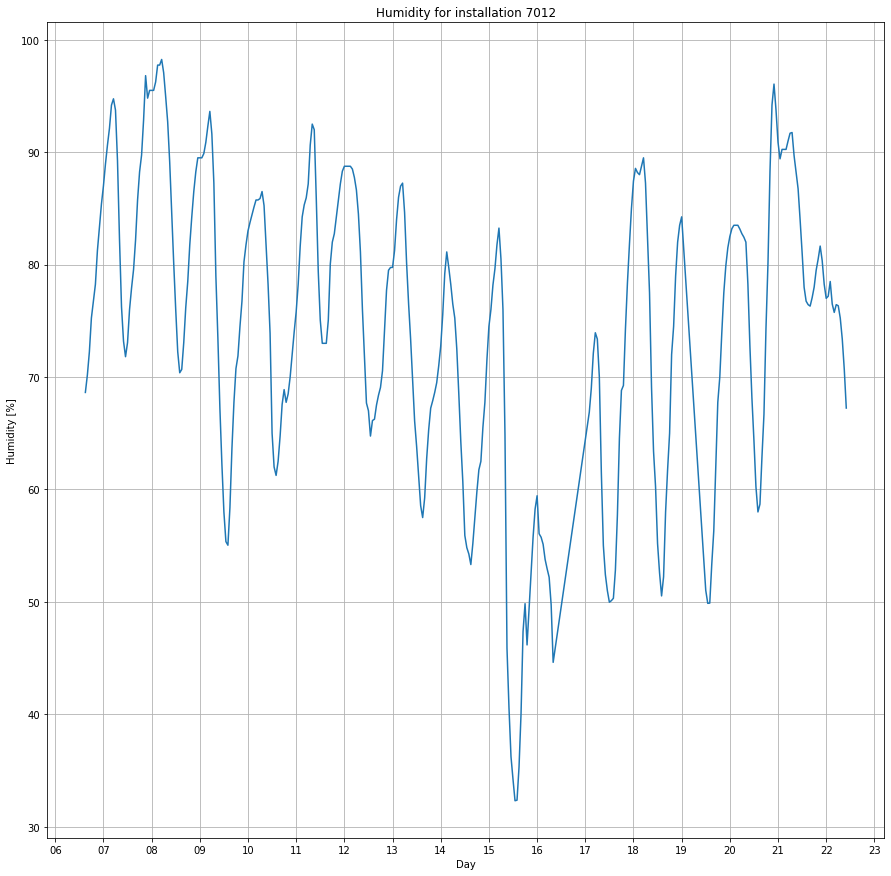

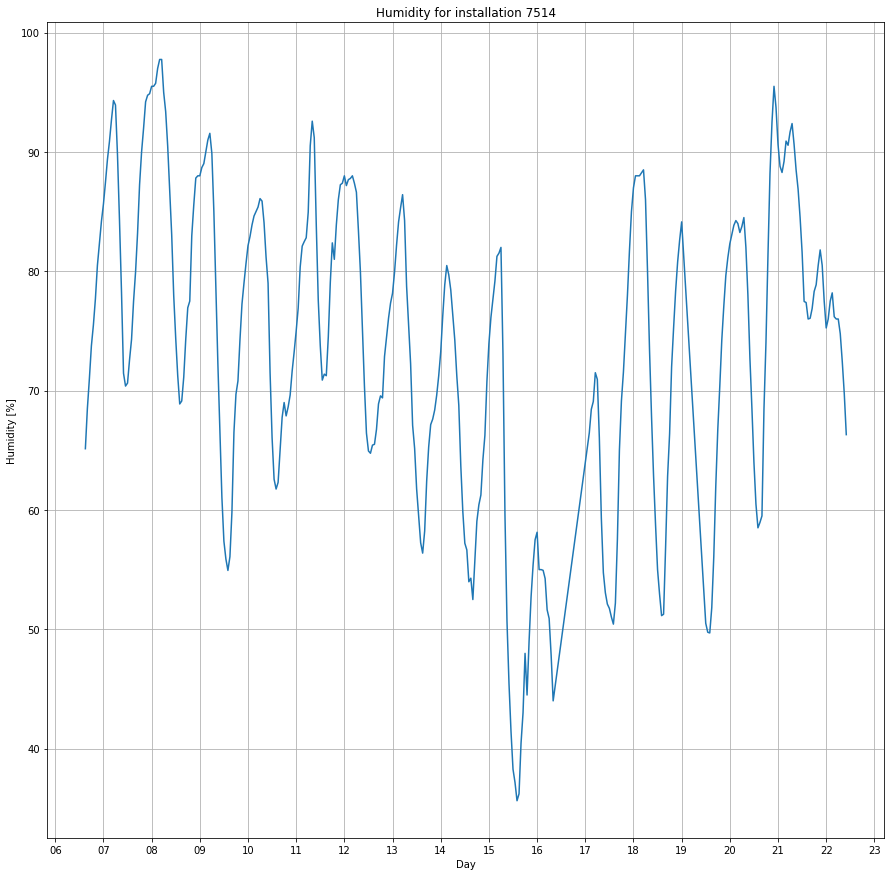

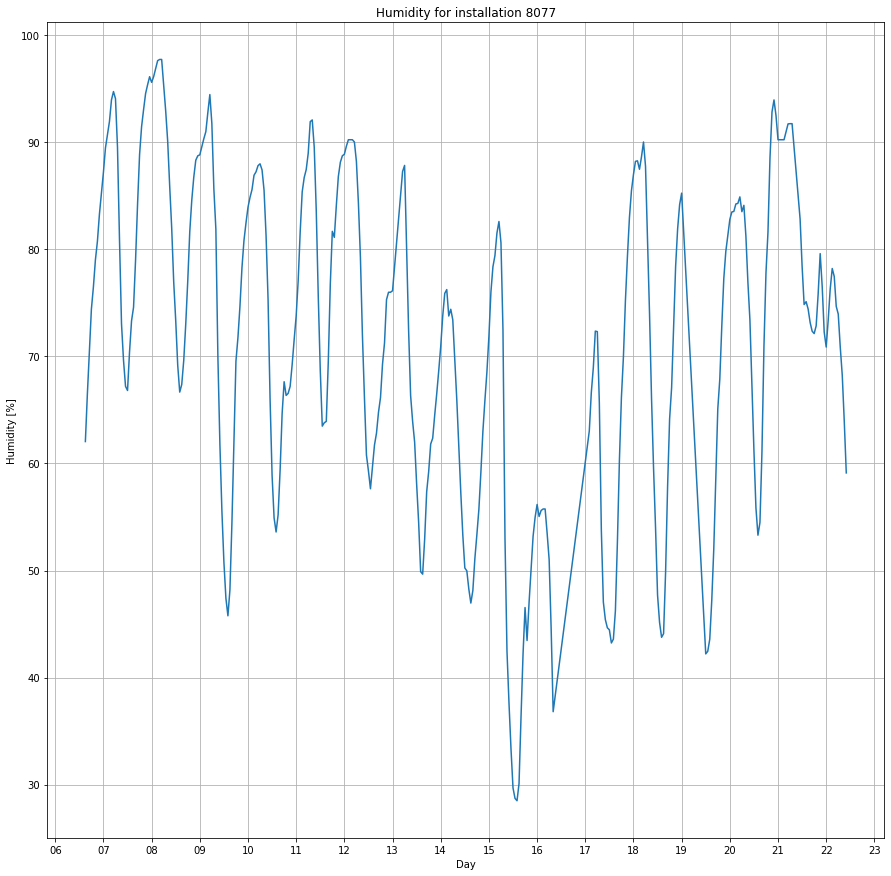

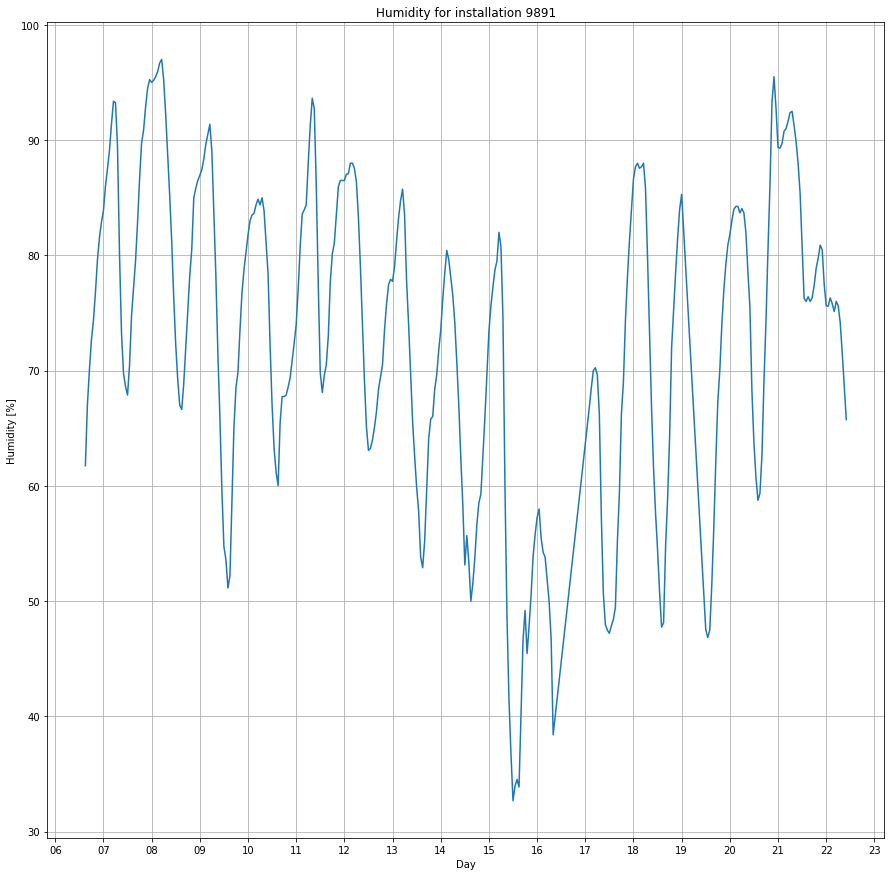

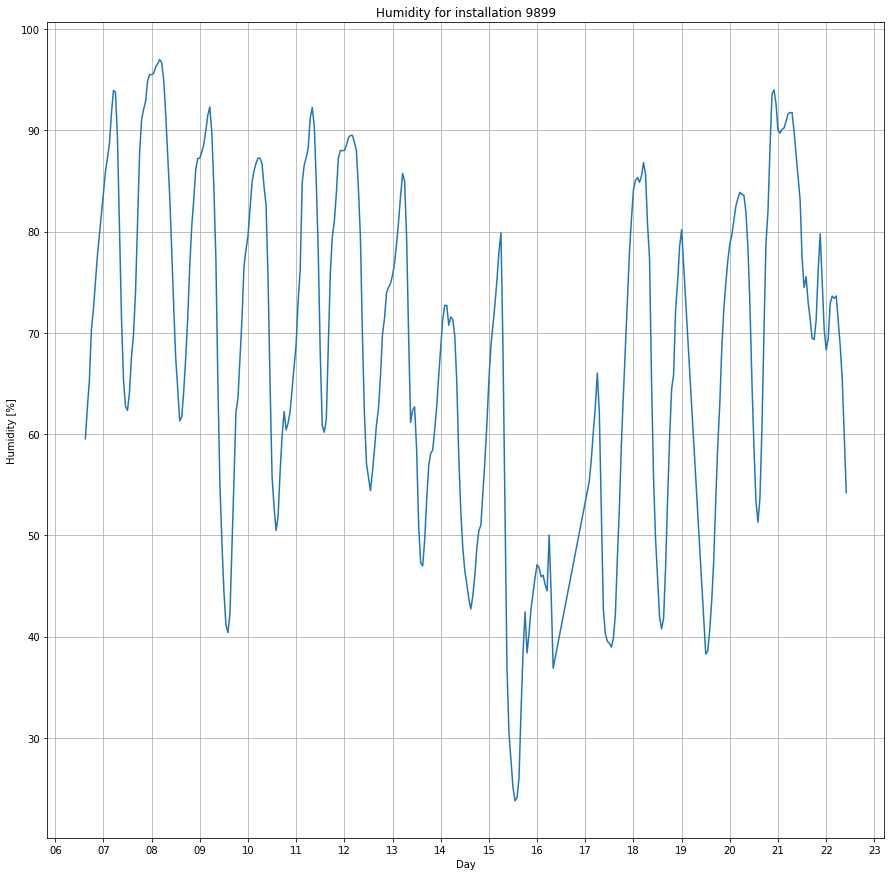

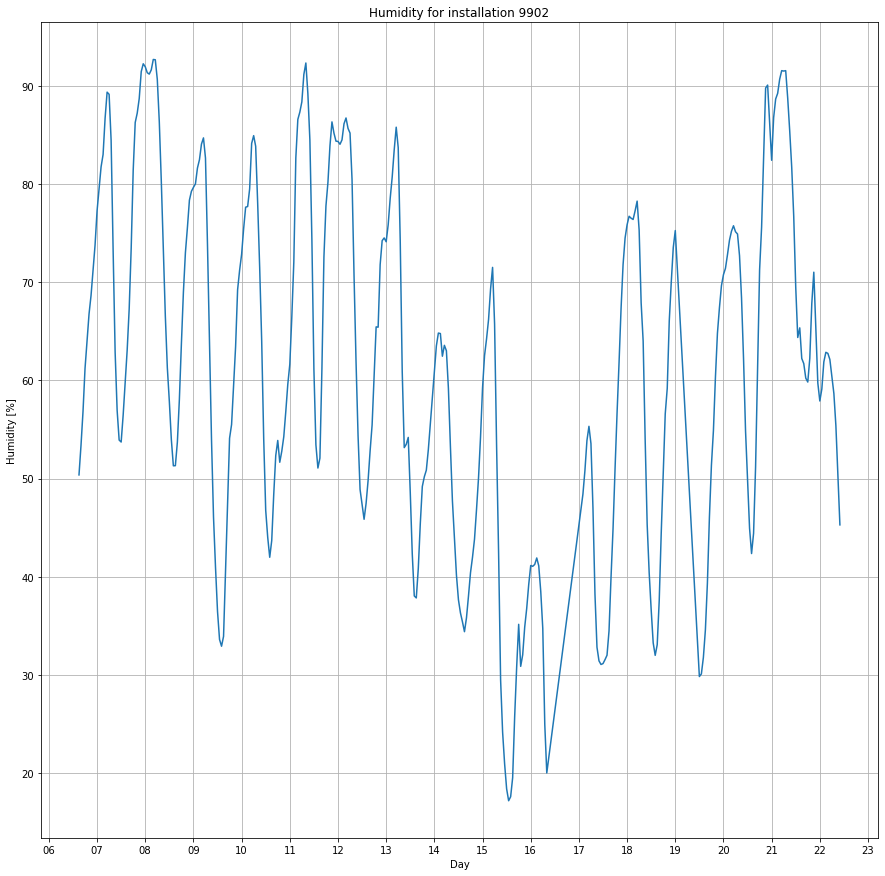

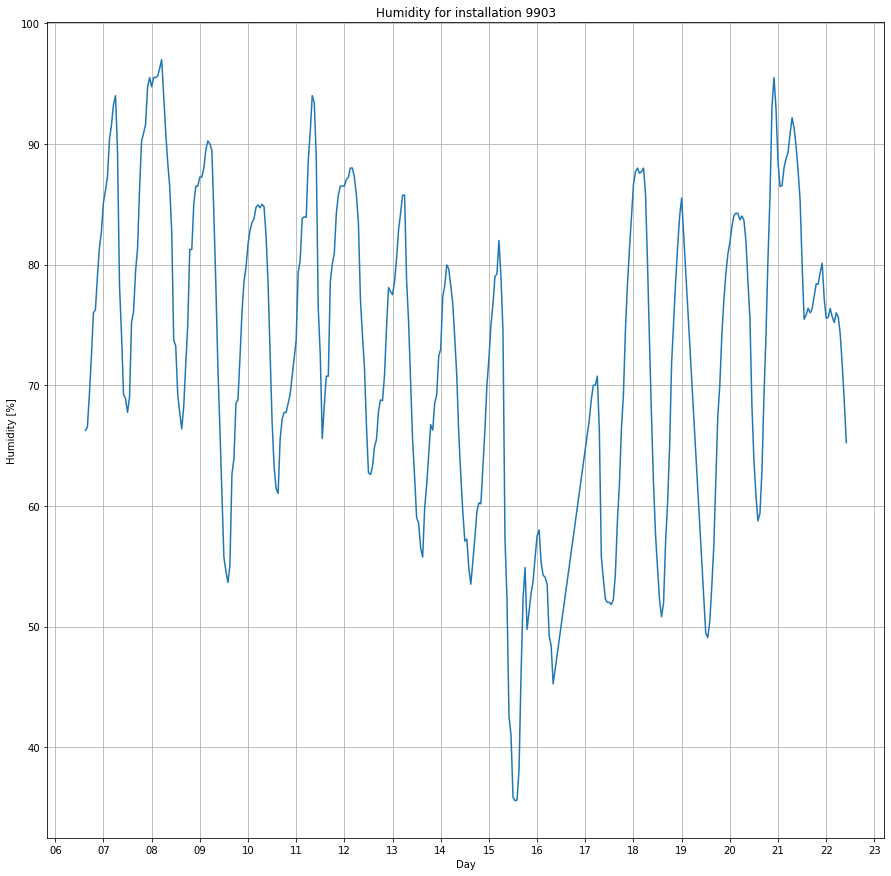

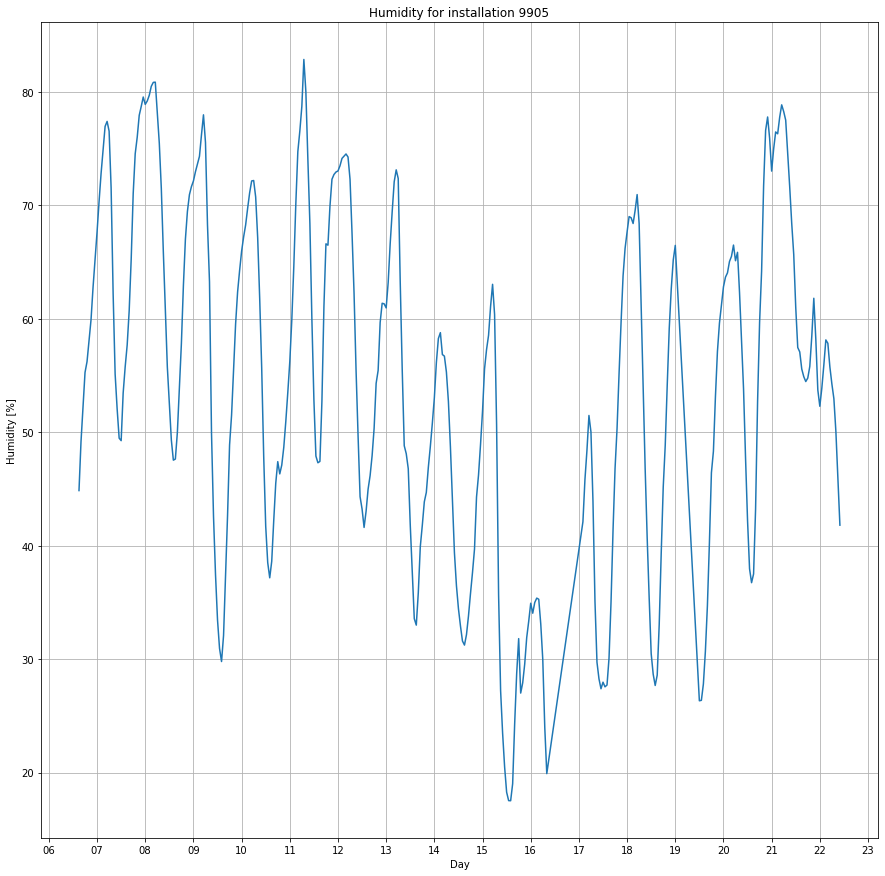

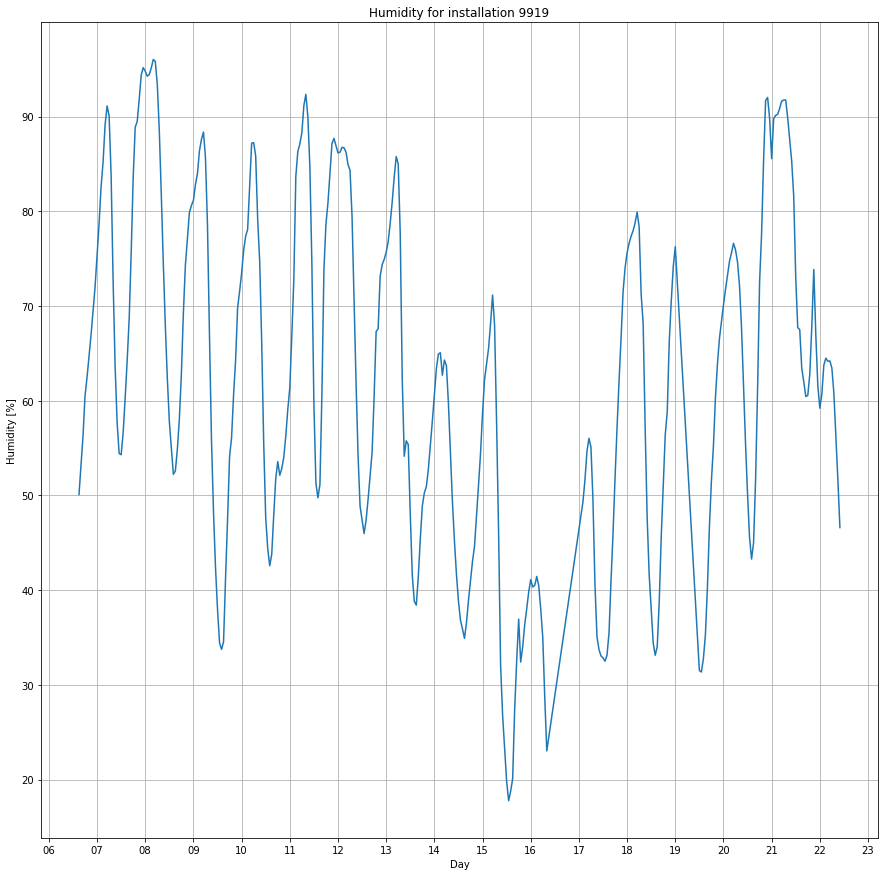

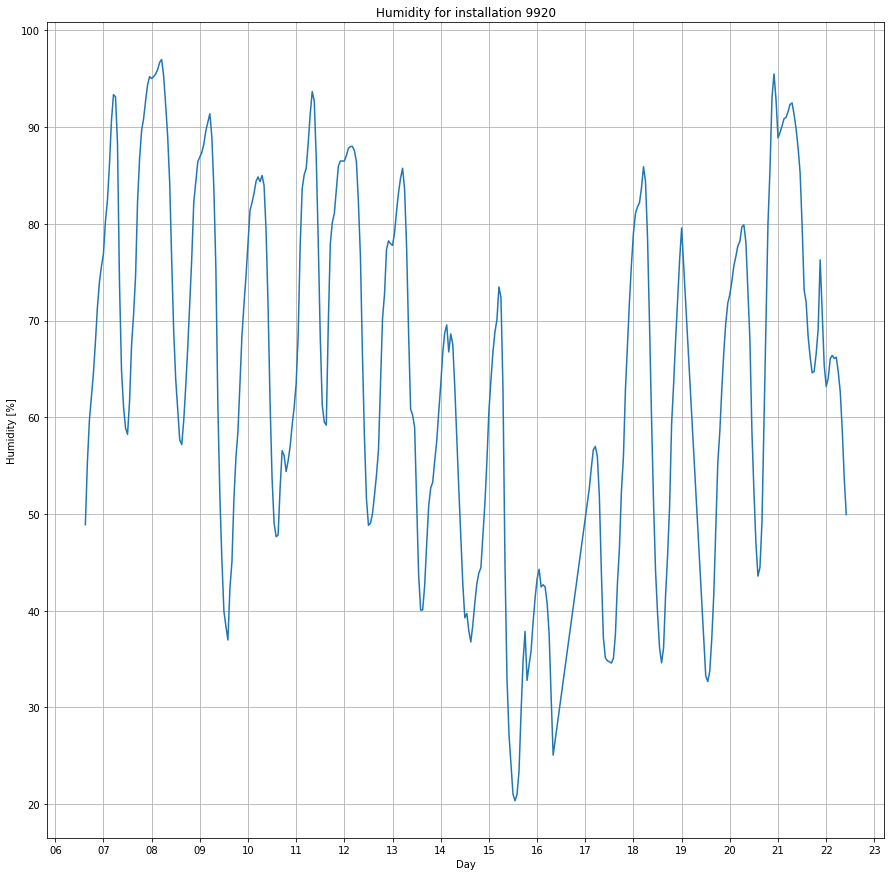

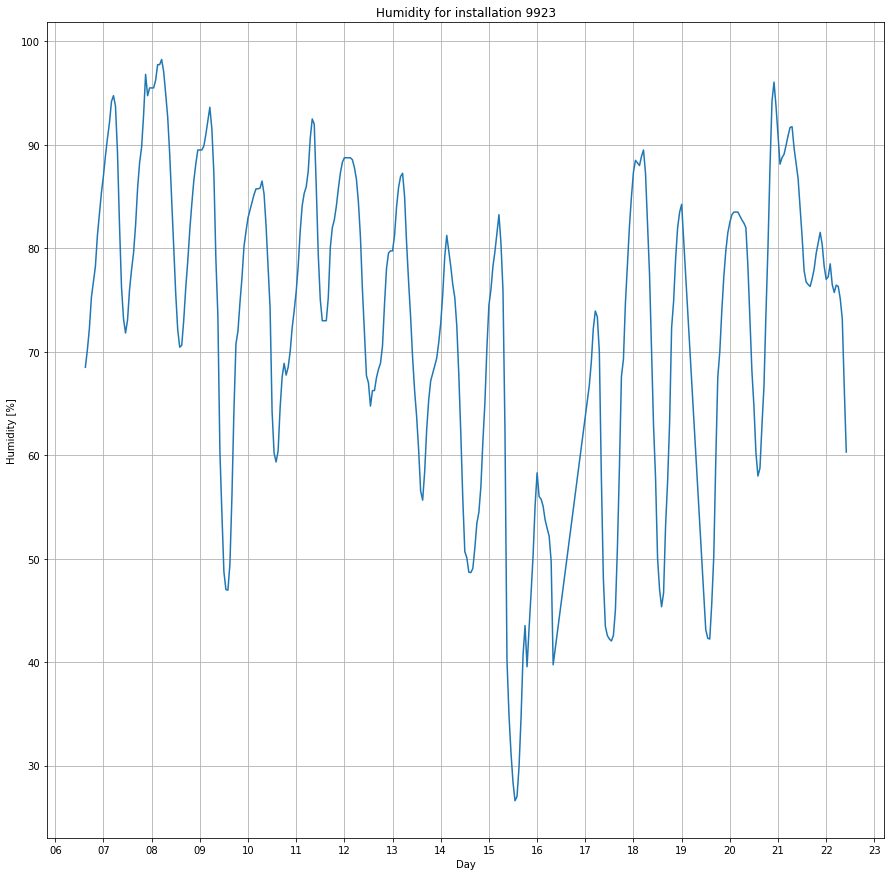

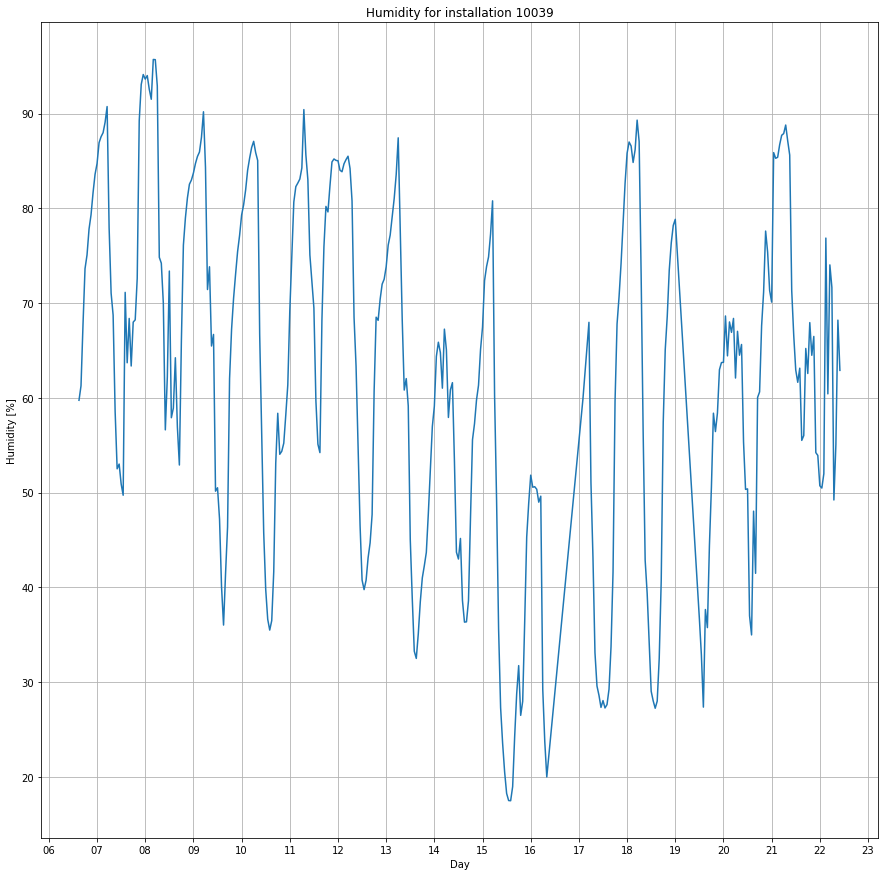

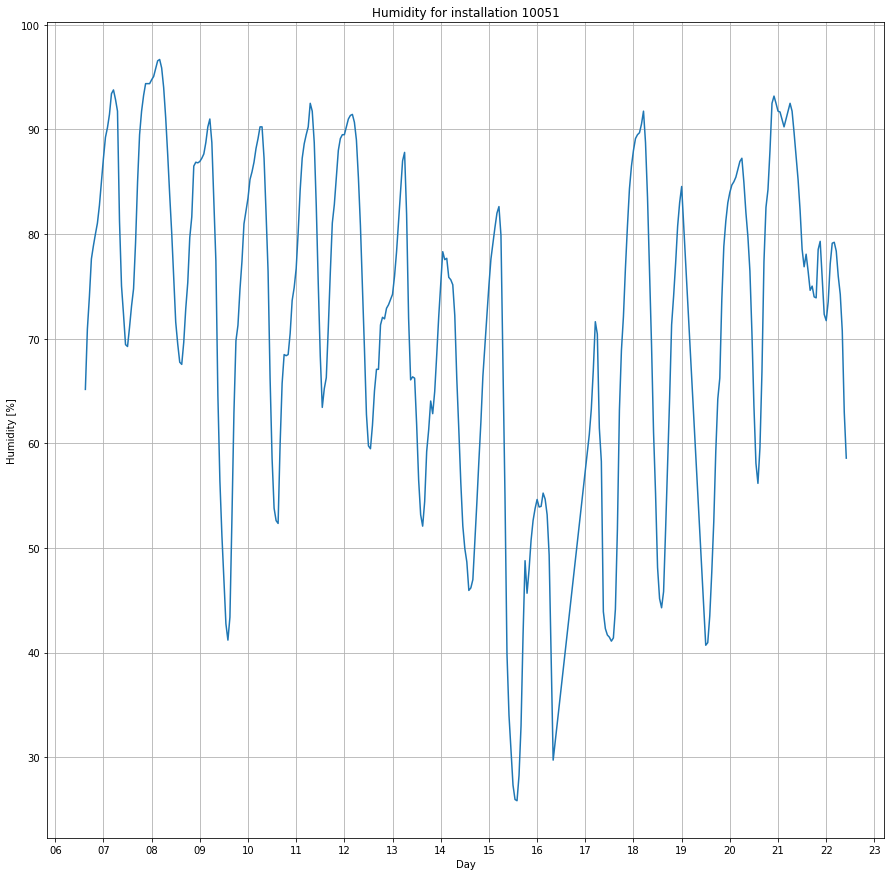

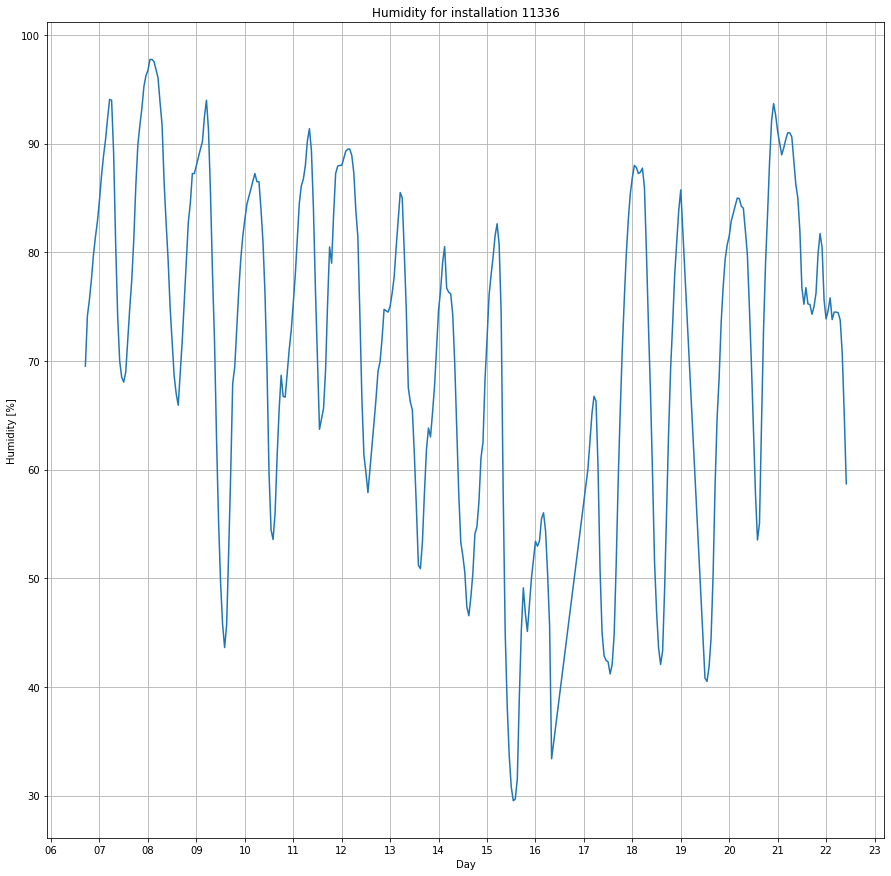

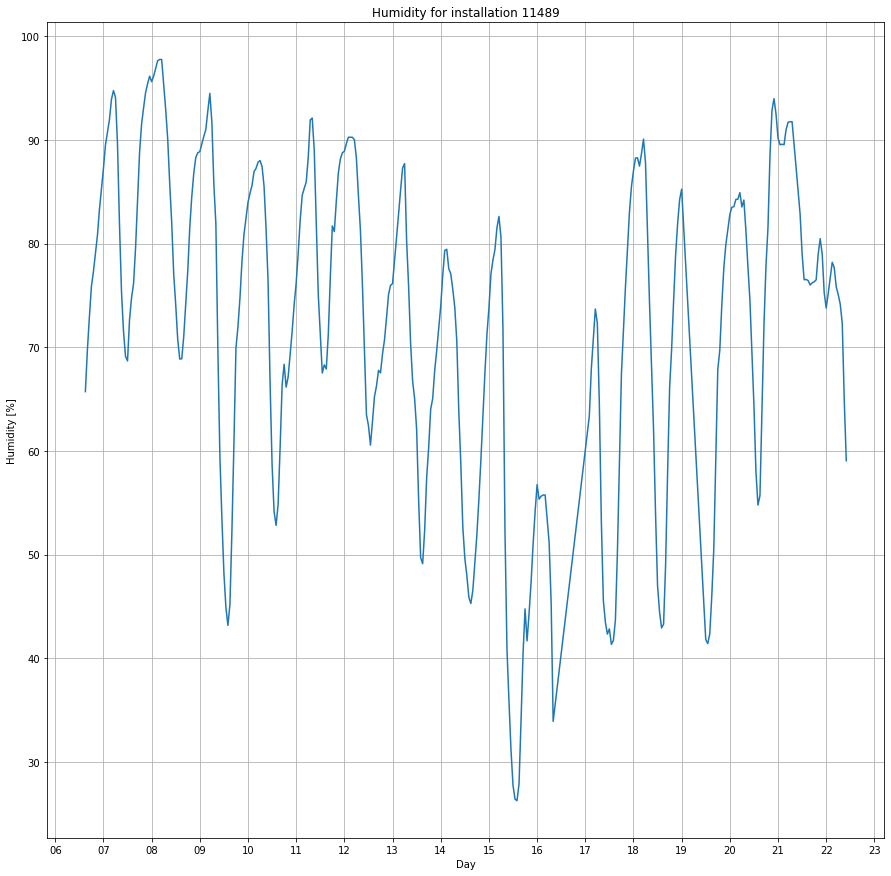

In [75]:
for id in installationd_id:
    plot_humidity(id)

## Data processing

In [39]:
from sklearn import preprocessing

data = df.iloc[:, 3:]
data.corr()

PM1      PM25      PM10  PRESSURE  HUMIDITY  TEMPERATURE  \
PM1          1.000000  0.990684  0.971542  0.245110  0.267086    -0.228338   
PM25         0.990684  1.000000  0.982699  0.236804  0.278653    -0.244325   
PM10         0.971542  0.982699  1.000000  0.258195  0.280948    -0.258596   
PRESSURE     0.245110  0.236804  0.258195  1.000000 -0.242296    -0.180960   
HUMIDITY     0.267086  0.278653  0.280948 -0.242296  1.000000    -0.260467   
TEMPERATURE -0.228338 -0.244325 -0.258596 -0.180960 -0.260467     1.000000   
indexValue   0.927707  0.932261  0.958212  0.298246  0.284122    -0.245295   
NO2               NaN  0.377628  0.508460       NaN       NaN          NaN   
CO                NaN  0.886423  0.909664       NaN       NaN          NaN   

             indexValue       NO2        CO  
PM1            0.927707       NaN       NaN  
PM25           0.932261  0.377628  0.886423  
PM10           0.958212  0.508460  0.909664  
PRESSURE       0.298246       NaN       NaN  
HUMIDITY       0.284122       NaN       NaN  
TEMPERATURE   -0.245295       NaN       NaN  
indexValue     1.000000  0.492542  0.887044  
NO2            0.492542  1.000000  0.597350  
CO             0.887044  0.597350  1.000000

In [80]:
for id in installationd_id:
    dd = df.loc[df['installationId'] == id][['TEMPERATURE', 'HUMIDITY']]
    cor = dd.corr()['TEMPERATURE']['HUMIDITY']
    print('Korelacja pomiędzy temperaturą a wilgotnością dla instancji: ' + str(id) + ': ' + str(cor))

Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 19: nan
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 329: -0.7308465874709755
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 332: -0.022300718674790766
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 1070: -0.3111969268307795
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 6076: -0.3378415398009472
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 7012: -0.28516224048280914
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 7514: -0.3397633099834675
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 8077: -0.2901517339326557
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 9891: -0.3140662087555265
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 9899: -0.2620137553030309
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 9902: -0.245152373699116
Korelacja pomiędzy temperaturą a wilgotnością dla instancji: 